# インポート

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import requests
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
from tqdm.notebook import tqdm

from pathlib import Path
%load_ext autoreload


In [6]:
pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 27.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 40.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install ipython==8.22.0

Reason for being yanked: Does not start with traitlets <5.12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.0/812.0 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 9.0.0
    Uninstalling ipython-9.0.0:
      Successfully uninstalled ipython-9.0.0
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install -U ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
conda install -c conda-forge jupyter_contrib_nbextensions


Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/load0/anaconda3/envs/py312

  added / updated specs:
    - jupyter_contrib_nbextensions


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anyio-4.8.0                |     pyhd8ed1ab_0         113 KB  conda-forge
    argon2-cffi-23.1.0         |     pyhd8ed1ab_1          18 KB  conda-forge
    argon2-cffi-bindings-21.2.0|  py312h5eee18b_1          33 KB
    arrow-1.3.0                |     pyhd8ed1ab_1          98 KB  conda-forge
    attrs-25.1.0               |     pyh71513ae_0          55 KB  conda-forge
    beautifulsoup4-4.13.3      |     pyha770c72_0         142 KB  conda-forge
    bleach-6.2.0               |     pyh29332c3_4         138 KB  conda-forge
    bleach-with-css-6.2.0      |       h82add2a_4           4 KB  conda-forge
    cached-property-1.

# ステップ

    1.カレンダーページから開催日一覧を取得
    2.開催ページからレースid一覧を取得
    3.レース結果ページからレース結果テーブルを一覧を取得


    チュートリアル
        スクレイピングに必要な各種パッケージを取得
        スクレイピングの流れを実装
        テーブル形式のものを表示

In [16]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import requests
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import pandas as pd



url = 'https://db.netkeiba.com/horse/2021101429/'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

# Requestオブジェクトを作成
req = Request(url, headers=headers)

# リクエストを送信
response = urlopen(req)
html = response.read()

pd.read_html(html)[2]


,日付,開催,天 気,R,レース名,映 像,頭 数,枠 番,馬 番,オ ッ ズ,...,着差,ﾀｲﾑ 指数,通過,ペース,上り,馬体重,厩舎 ｺﾒﾝﾄ,備考,勝ち馬 (2着馬),賞金
0,2025/02/23,1京都8,曇,9,山城S(3勝クラス),NaN,9,8,9,3.6,...,0.4,**,3-3,36.4-34.1,34.2,460(-4),NaN,NaN,スカイロケット,NaN
1,2025/02/02,1東京2,曇,10,節分S(3勝クラス),NaN,11,5,5,2.3,...,0.6,**,11-11,35.3-34.7,33.6,464(+6),NaN,NaN,オードリーバローズ,NaN
2,2024/11/09,5東京3,晴,10,奥多摩S(3勝クラス),NaN,14,5,8,3.8,...,0.2,**,7-5,35.4-34.4,33.7,458(+2),NaN,NaN,セントメモリーズ,NaN
3,2024/10/06,4東京2,曇,8,3歳以上2勝クラス,NaN,13,6,8,1.9,...,-0.5,**,6-6,33.8-34.5,33.8,456(-2),NaN,NaN,(ニコラウス),1140.0
4,2024/09/01,3新潟8,晴,9,飯豊特別(2勝クラス),NaN,7,7,7,3.0,...,0.4,**,4-4,35.2-34.4,34.4,458(-2),NaN,NaN,セントメモリーズ,625.2
5,2024/08/10,3新潟1,晴,10,新発田城特別(2勝クラス),NaN,14,8,13,11.3,...,0.0,**,10-10,33.5-35.0,33.9,460(-4),NaN,NaN,サクセスアイ,629.2
6,2024/04/06,3中山5,曇,11,ニュージーランドT(GII),NaN,16,8,16,75.3,...,0.9,**,14-16-16,36.0-35.5,34.9,464(0),NaN,NaN,エコロブルーム,NaN
7,2024/03/16,1中京3,晴,11,中スポ賞ファルコンS(GIII),NaN,17,2,3,10.1,...,0.9,**,12-12,33.8-34.7,34.7,464(+8),NaN,NaN,ダノンマッキンリー,NaN
8,2023/12/17,5阪神6,晴,11,朝日フューチュリティ(GI),NaN,17,2,4,116.0,...,0.4,**,13-15,34.1-35.4,34.6,456(+2),NaN,NaN,ジャンタルマンタル,NaN
9,2023/11/18,5東京5,晴,6,2歳1勝クラス,NaN,9,5,5,2.3,...,-0.3,**,5-4,34.8-34.7,33.8,454(+2),NaN,NaN,(クリノハレルヤ),780.0


In [8]:
pd.read_html(html)[0]

,着 順,枠 番,馬 番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人 気,馬体重,調教師
0,1,7,13,レガレイラ,牝2,55,ルメール,2:00.2,NaN,3.1,1.0,454(-2),[東] 木村哲也
1,2,3,6,シンエンペラー,牡2,56,ムルザバ,2:00.3,3/4,3.1,2.0,482(+2),[西] 矢作芳人
2,3,3,5,サンライズジパング,牡2,56,菅原明良,2:00.6,2,128.7,13.0,512(-2),[西] 音無秀孝
3,4,2,4,アドミラルシップ,牡2,56,ドイル,2:00.7,3/4,69.2,11.0,460(+2),[東] 相沢郁
4,5,8,18,ミスタージーティー,牡2,56,坂井瑠星,2:00.7,アタマ,15.1,7.0,474(+2),[西] 矢作芳人
5,6,5,10,シリウスコルト,牡2,56,三浦皇成,2:00.8,クビ,29.7,9.0,480(+14),[東] 宗像義忠
6,7,6,11,ショウナンラプンタ,牡2,56,鮫島克駿,2:01.0,1.1/4,9.0,3.0,528(+8),[西] 高野友和
7,8,4,8,インザモーメント,牡2,56,佐々木大,2:01.0,クビ,92.5,12.0,486(+6),[西] 田中克典
8,9,6,12,ディスペランツァ,牡2,56,モリス,2:01.1,クビ,37.5,10.0,516(-6),[西] 吉岡辰弥
9,10,1,2,ヴェロキラプトル,牡2,56,戸崎圭太,2:01.5,2.1/2,14.3,5.0,468(+14),[西] 高野友和


In [7]:
pd.read_html(html)[2]

,0,1,2,3
0,ワイド,6 - 13 5 - 13 5 - 6,"280 5,130 5,390",1 44 45
1,馬単,13 → 6,1150,2
2,三連複,5 - 6 - 13,18800,58
3,三連単,13 → 6 → 5,56240,166


# 開催日一覧を取得


    ２０２４年１月のレース開催日idを抽出してみる    

In [18]:
#サイトのhtmlをスクレイピング
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}
url = "https://race.netkeiba.com/top/calendar.html?year=2024&month=1"

# Requestオブジェクトを作成
req = Request(url, headers=headers)

# リクエストを送信 # URLのHTMLを取得
html =urlopen(req).read()
html


b'<!DOCTYPE html>\n<html>\n<head>\n<meta charset="EUC-JP">\n<!-- block=common__meta_tag_common_race_schedule (d) -->\n<meta http-equiv="content-language" content="ja">\n<meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n<meta name="viewport" content="width=1000">\n<meta name="format-detection" content="telephone=no" />\n<title>\xb3\xab\xba\xc5\xc6\xfc\xc4\xf8 | \xa5\xec\xa1\xbc\xa5\xb9\xbe\xf0\xca\xf3(JRA) - netkeiba</title>\n<meta name="description" content="\xc3\xe6\xb1\xfb\xb6\xa5\xc7\xcf\xa1\xcaJRA\xa1\xcb\xb3\xab\xba\xc5\xa5\xec\xa1\xbc\xa5\xb9\xa4\xce\xb3\xab\xba\xc5\xc6\xfc\xc4\xf8\xa5\xda\xa1\xbc\xa5\xb8\xa4\xc7\xa4\xb9\xa1\xa3\xc3\xe6\xb1\xfb\xb6\xa5\xc7\xcf\xa1\xcaJRA\xa1\xcb\xb3\xab\xba\xc5\xa5\xec\xa1\xbc\xa5\xb9\xa4\xce\xbd\xd0\xc7\xcf\xc9\xbd\xa4\xe4\xba\xc7\xbf\xb7\xa5\xaa\xa5\xc3\xa5\xba\xa1\xa2\xa5\xec\xa1\xbc\xa5\xb9\xb7\xeb\xb2\xcc\xc2\xae\xca\xf3\xa1\xa2\xca\xa7\xcc\xe1\xbe\xf0\xca\xf3\xa4\xf2\xa4\xcf\xa4\xb8\xa4\xe1\xa1\xa2\xb6\xa5\xc7\xcf\xcd\xbd\xc1\xdb\xa4\

In [19]:
#BeautifulSoupで文字列を加工
soup = BeautifulSoup(html)
soup

#soup.find("table")

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<!-- block=common__meta_tag_common_race_schedule (d) -->
<meta content="ja" http-equiv="content-language"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1000" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<title>開催日程 | レース情報(JRA) - netkeiba</title>
<meta content="中央競馬（JRA）開催レースの開催日程ページです。中央競馬（JRA）開催レースの出馬表や最新オッズ、レース結果速報、払戻情報をはじめ、競馬予想やデータ分析など予想に役立つ情報も満載です。" name="description"/>
<meta content="競馬,keiba,開催日程,スケジュール,開催日,netkeiba,ネット競馬,netkeiba" name="keywords"/>
<meta content="https://www.netkeiba.com/style/netkeiba.ja/image/netkeiba_logo_keiba.png" name="thumbnail"/>
<!-- ogp用 -->
<meta content="netkeiba" property="og:site_name"/>
<meta content="article" property="og:type"/>
<meta content="開催日程 | レース情報(JRA) - netkeiba" property="og:title"/>
<meta content="https://race.netkeiba.com/top/calendar.html" property="og:url"/>
<meta content="中央競馬（JRA）開催レースの開催日程ページです。中央競馬（JRA）開催レースの出馬表や最

In [21]:
soup.find("table")

<table class="Calendar_Table">
<tbody>
<tr class="Header">
<th>月</th>
<th>火</th>
<th>水</th>
<th>木</th>
<th>金</th>
<th class="Sat_Cell">土</th>
<th class="Sun_Cell">日</th>
</tr>
<tr class="Week">
<td class="RaceCellBox">
<div class="RaceKaisaiBox">
<p><span class="Day">1</span></p>
</div>
</td><td class="RaceCellBox">
<div class="RaceKaisaiBox">
<p><span class="Day">2</span></p>
</div>
</td><td class="RaceCellBox">
<div class="RaceKaisaiBox">
<p><span class="Day">3</span></p>
</div>
</td><td class="RaceCellBox">
<div class="RaceKaisaiBox">
<p><span class="Day">4</span></p>
</div>
</td><td class="RaceCellBox">
<div class="RaceKaisaiBox">
<p><span class="Day">5</span></p>
</div>
</td><td class="RaceCellBox">
<a href="../top/race_list.html?kaisai_date=20240106" target="_parent" tile="">
<div class="RaceKaisaiBox HaveData">
<p><span class="Day">6</span></p>
<p><span class="JyoName">中山</span><span class="JName">中山金杯</span></p>
<p><span class="JyoName">京都</span><span class="JName">京都金杯</span><

In [50]:
soup.find("table", class_="Calendar_Table").find("a")
a = soup.find("table", class_="Calendar_Table").find("a")
a

<a href="../top/race_list.html?kaisai_date=20240106" target="_parent" tile="">
<div class="RaceKaisaiBox HaveData">
<p><span class="Day">6</span></p>
<p><span class="JyoName">中山</span><span class="JName">中山金杯</span></p>
<p><span class="JyoName">京都</span><span class="JName">京都金杯</span></p>
</div><!-- /. RaceKaisaiBox-->
</a>

In [30]:
a["href"]

'../top/race_list.html?kaisai_date=20240106'

In [177]:
import re

re.findall(r"kaisai_date=\d{8}", a["href"])
re.findall(r"kaisai_date=(\d{8})", a["href"])[0]




'20240128'

In [56]:
#"a"タグのついた全ての要素を取り出す
a_list = soup.find("table", class_="Calendar_Table").find_all("a")

In [87]:
#for文より開催日idをリストに格納

kaisai_date_list = []

for a in a_list:
    kaisai_date = re.findall(r"kaisai_date=(\d{8})", a["href"])[0]
    kaisai_date_list.append(kaisai_date)

In [88]:
kaisai_date_list

['20240106',
 '20240107',
 '20240108',
 '20240113',
 '20240114',
 '20240120',
 '20240121',
 '20240127',
 '20240128']

In [83]:
# scrape_kaisai_date関数より各月のカレンダーのurlを取得し、開催日idを得る

def scrape_kaisai_date(year, month):

    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
    }
    url = f"https://race.netkeiba.com/top/calendar.html?year={year}&month={month}"
    #print(url)
    # Requestオブジェクトを作成
    req = Request(url, headers=headers)
    
    # リクエストを送信 # URLのHTMLを取得 #スクレイピング
    html =urlopen(req).read()
    #htmlを加工
    soup = BeautifulSoup(html)
    #html文字列から開催日idを取り出す
    a_list = soup.find("table", class_="Calendar_Table").find_all("a")
    kaisai_date_list = []

    for a in a_list:
        kaisai_date = re.findall(r"kaisai_date=(\d{8})", a["href"])[0]
        kaisai_date_list.append(kaisai_date)
        
    return kaisai_date_list

In [84]:
#例えば２０２４年２月を指定
scrape_kaisai_date(year = 2024, month = 2)


https://race.netkeiba.com/top/calendar.html?year=2024&month=2


['20240203',
 '20240204',
 '20240210',
 '20240211',
 '20240217',
 '20240218',
 '20240224',
 '20240225']

In [82]:
#ここで1年分の開催idを同時に持ってくる方法を考える

#pd.date_range関数を使用　#MS=month start
from_ = "2024-1"
to_ = "2024-12"
for date in pd.date_range(from_, to_, freq="MS"):
    print(date)

2024-01-01 00:00:00
2024-02-01 00:00:00
2024-03-01 00:00:00
2024-04-01 00:00:00
2024-05-01 00:00:00
2024-06-01 00:00:00
2024-07-01 00:00:00
2024-08-01 00:00:00
2024-09-01 00:00:00
2024-10-01 00:00:00
2024-11-01 00:00:00
2024-12-01 00:00:00


In [81]:
for date in pd.date_range(from_, to_, freq="MS"):
    year = date.year
    month = date.month
    url = f"https://race.netkeiba.com/top/calendar.html?year={year}&month={month}"
    print(url)
    
    

https://race.netkeiba.com/top/calendar.html?year=2024&month=1
https://race.netkeiba.com/top/calendar.html?year=2024&month=2
https://race.netkeiba.com/top/calendar.html?year=2024&month=3
https://race.netkeiba.com/top/calendar.html?year=2024&month=4
https://race.netkeiba.com/top/calendar.html?year=2024&month=5
https://race.netkeiba.com/top/calendar.html?year=2024&month=6
https://race.netkeiba.com/top/calendar.html?year=2024&month=7
https://race.netkeiba.com/top/calendar.html?year=2024&month=8
https://race.netkeiba.com/top/calendar.html?year=2024&month=9
https://race.netkeiba.com/top/calendar.html?year=2024&month=10
https://race.netkeiba.com/top/calendar.html?year=2024&month=11
https://race.netkeiba.com/top/calendar.html?year=2024&month=12


In [106]:
#scrape_kaisai_date関数に上のコードを組み込む
#time関数またtqdm関数をインポート

import time
from tqdm.notebook import tqdm

def scrape_kaisai_date(from_, to_):
    kaisai_date_list = []
    for date in tqdm(pd.date_range(from_, to_, freq="MS")):
        year = date.year
        month = date.month
        url = f"https://race.netkeiba.com/top/calendar.html?year={year}&month={month}"
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
        }
        # Requestオブジェクトを作成
        req = Request(url, headers=headers)
        # リクエストを送信 # URLのHTMLを取得 #スクレイピング
        html = urlopen(req).read()
        time.sleep(1) #サーバーに負荷をかけないようにする(for文とスクレイピングが出てきたときは注意する)
        #htmlを加工
        soup = BeautifulSoup(html)
        #html文字列から開催日idを取り出す
        a_list = soup.find("table", class_="Calendar_Table").find_all("a")
       
        for a in a_list:
            kaisai_date = re.findall(r"kaisai_date=(\d{8})", a["href"])[0]
            kaisai_date_list.append(kaisai_date)
            
    return kaisai_date_list

In [4]:
scrape_kaisai_date(from_="2024-1", to_="2024-12")

NameError: name 'scrape_kaisai_date' is not defined

# 開催ページからレースidを取得

In [56]:
url = "https://race.netkeiba.com/top/race_list.html?kaisai_date=20240106"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
          }
req = Request(url, headers=headers)
html = urlopen(req).read()
soup = BeautifulSoup(html)

In [46]:
race_id = soup.find("div", class_="RaceList_Box")

In [47]:
race_id

## javascriptで書かれたものはbeautifulsoupで取得できないのでChromedriverを使う

In [9]:
pip --version


pip 24.2 from c:\Users\Onoe Daichi\anaconda3\Lib\site-packages\pip (python 3.12)Note: you may need to restart the kernel to use updated packages.




In [17]:
# pip show selenium
pip install --upgrade selenium

SyntaxError: invalid syntax (3478280378.py, line 2)

## (2025/1/22　追記) drivermanagerがchromeの旧バージョンを撮ってきてしまうので、driver_pathを指定する方法で代用


In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# 最新のChromeDriverを自動的にダウンロードして使用
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# driver_pathにChromeDriverのパスを指定
# driver_path = 'C:/Users/Onoe Daichi/Downloads/競馬AI/keiba_ai/common/src/chromedriver-win32/chromedriver.exe'
driver_path = '/home/load0/ダウンロード/chromedriver-linux64/chromedriver'
driver_path
driver = webdriver.Chrome(service=Service(driver_path))
url = "https://race.netkeiba.com/top/race_list.html?kaisai_date=20240106"
driver.get(url)


In [6]:
#urlを指定してページに飛ぶ
url = "https://race.netkeiba.com/top/race_list.html?kaisai_date=20240106"
driver.get(url)

InvalidSessionIdException: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: chrome=134.0.6998.165)
Stacktrace:
#0 0x630d4e770a1a <unknown>
#1 0x630d4e228390 <unknown>
#2 0x630d4e20e12e <unknown>
#3 0x630d4e236d50 <unknown>
#4 0x630d4e2a8559 <unknown>
#5 0x630d4e2c59f5 <unknown>
#6 0x630d4e29f9a3 <unknown>
#7 0x630d4e26b60e <unknown>
#8 0x630d4e26cdd1 <unknown>
#9 0x630d4e736ddb <unknown>
#10 0x630d4e73acbc <unknown>
#11 0x630d4e71e392 <unknown>
#12 0x630d4e73b834 <unknown>
#13 0x630d4e7021ef <unknown>
#14 0x630d4e75f038 <unknown>
#15 0x630d4e75f216 <unknown>
#16 0x630d4e76f896 <unknown>
#17 0x79fe38c94ac3 <unknown>


In [1]:
pip show webdriver_manager

Name: webdriver-manager
Version: 4.0.2
Summary: Library provides the way to automatically manage drivers for different browsers
Home-page: https://github.com/SergeyPirogov/webdriver_manager
Author: Sergey Pirogov
Author-email: automationremarks@gmail.com
License: 
Location: c:\Users\Onoe Daichi\anaconda3\Lib\site-packages
Requires: packaging, python-dotenv, requests
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install --upgrade selenium

In [26]:
pip install --upgrade webdriver_manager

Note: you may need to restart the kernel to use updated packages.


In [22]:
#現バージョンのchromeを開く
driver = webdriver.Chrome(service=Service(driver_path))
# driver = webdriver.Chrome()

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 114
Current browser version is 132.0.6834.84 with binary path C:\Program Files\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	GetHandleVerifier [0x009FA813+48355]
	(No symbol) [0x0098C4B1]
	(No symbol) [0x00895358]
	(No symbol) [0x008B61AC]
	(No symbol) [0x008B1EF3]
	(No symbol) [0x008B0579]
	(No symbol) [0x008E0C55]
	(No symbol) [0x008E093C]
	(No symbol) [0x008DA536]
	(No symbol) [0x008B82DC]
	(No symbol) [0x008B93DD]
	GetHandleVerifier [0x00C5AABD+2539405]
	GetHandleVerifier [0x00C9A78F+2800735]
	GetHandleVerifier [0x00C9456C+2775612]
	GetHandleVerifier [0x00A851E0+616112]
	(No symbol) [0x00995F8C]
	(No symbol) [0x00992328]
	(No symbol) [0x0099240B]
	(No symbol) [0x00984FF7]
	BaseThreadInitThunk [0x76B17BA9+25]
	RtlInitializeExceptionChain [0x77E6C0CB+107]
	RtlClearBits [0x77E6C04F+191]


In [61]:
from  selenium.webdriver.common.by import By
li_list = driver.find_elements(By.CLASS_NAME, "RaceList_DataItem")

In [55]:
li = li_list
li

NameError: name 'li_list' is not defined

In [54]:
href = li.find_element(By.TAG_NAME, "a").get_attribute("href")
href

NameError: name 'li_list' is not defined

In [133]:
re.findall(r"race_id=(\d{12})",href)[0]

'202406010101'

In [156]:
race_id_list = []
for li in li_list:
    href = li.find_element(By.TAG_NAME, "a").get_attribute("href")
    race_id =  re.findall(r"race_id=(\d{12})",href)[0]
    # print(race_id)
    race_id_list.append(race_id)
    

In [6]:
race_id_list

['202406010101',
 '202406010102',
 '202406010103',
 '202406010104',
 '202406010105',
 '202406010106',
 '202406010107',
 '202406010108',
 '202406010109',
 '202406010110',
 '202406010111',
 '202406010112',
 '202408010101',
 '202408010102',
 '202408010103',
 '202408010104',
 '202408010105',
 '202408010106',
 '202408010107',
 '202408010108',
 '202408010109',
 '202408010110',
 '202408010111',
 '202408010112',
 '202406010201',
 '202406010202',
 '202406010203',
 '202406010204',
 '202406010205',
 '202406010206',
 '202406010207',
 '202406010208',
 '202406010209',
 '202406010210',
 '202406010211',
 '202406010212',
 '202408010201',
 '202408010202',
 '202408010203',
 '202408010204',
 '202408010205',
 '202408010206',
 '202408010207',
 '202408010208',
 '202408010209',
 '202408010210',
 '202408010211',
 '202408010212',
 '202406010301',
 '202406010302',
 '202406010303',
 '202406010304',
 '202406010305',
 '202406010306',
 '202406010307',
 '202406010308',
 '202406010309',
 '202406010310',
 '202406010311

In [160]:
del len
len(race_id_list)

24

In [168]:
driver.quit()

In [2]:
import scraping
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
kaisai_date_list = scraping.scrape_kaisai_date(from_="2024-1", to_="2024-1")

  0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import requests
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
from tqdm.notebook import tqdm
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

def scrape_race_id_list(kaisai_date_list):
    options = Options()
    options.add_argument("--headless") #バックグラウンドで実行
    #最新のChromeDriverを自動的にダウンロードして使用できるが故障しているので廃止中
    driver_path = ChromeDriverManager().install() 
    # 無理やりpathを指定
    # driver_path = 'C:/Users/Onoe Daichi/Downloads/競馬AI/keiba_ai/common/src/chromedriver-win32/chromedriver.exe'
    driver_path = '/home/load0/ダウンロード/chromedriver-linux64/chromedriver'
    race_id_list = []

    # 処理が終わったときに自動的にchromeを閉じる関数
    with webdriver.Chrome(service=Service(driver_path), options=options) as driver:
        for kaisai_date in tqdm(kaisai_date_list):
            url = f"https://race.netkeiba.com/top/race_list.html?kaisai_date={kaisai_date}"
            # 予想外のエラーが起きたときなどにexceptに移る
            try:
                driver.get(url)
                time.sleep(1)
                li_list = driver.find_elements(By.CLASS_NAME, "RaceList_DataItem")
                for li in li_list:
                    href = li.find_element(By.TAG_NAME, "a").get_attribute("href")
                    race_id =  re.findall(r"race_id=(\d{12})",href)[0]
                    race_id_list.append(race_id)
            except:
                print(f"stopped at {url}") #どのurlでエラーが起きたのか表示する
                # print(traceback.format_exc()) #エラーの内容を表示する
                break
    return race_id_list
        

In [19]:
pip install --upgrade selenium

Note: you may need to restart the kernel to use updated packages.


In [13]:
%autoreload

In [10]:
import scraping
kaisai_date_list = scraping.scrape_kaisai_date(from_="2024-1", to_="2024-1")    

  0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
kaisai_date = kaisai_date_list[0]
kaisai_date

'20240106'

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<!-- metaエリア -->
<!-- block=common__meta_tag_common_race (d) -->
<meta content="ja" http-equiv="content-language"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1000" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="2024年1月6日のレース一覧です。JRA開催レースの出馬表や最新オッズ、レース結果速報、払戻情報をはじめ、競馬予想やデータ分析など予想に役立つ情報も満載です。" name="description"/>
<meta content="競馬,keiba,出馬表,オッズ,予想,レース結果,払戻し,結果速報,競馬予想,ネット競馬,netkeiba" name="keywords"/>
<meta content="https://www.netkeiba.com/style/netkeiba.ja/image/netkeiba.png" name="thumbnail"/>
<!-- ogp用 -->
<meta content="netkeiba" property="og:site_name"/>
<meta content="article" property="og:type"/>
<meta content="レース一覧 | 2024年1月6日 レース情報(JRA) - netkeiba" property="og:title"/>
<meta content="https://race.netkeiba.com/top/race_list.html?kaisai_date=20240106" property="og:url"/>
<meta content="2024年1月6日のレース一覧です。JRA開催レースの出馬表や最新オッズ、レース結果速報、払戻情報をはじめ、競馬予想やデータ分析など
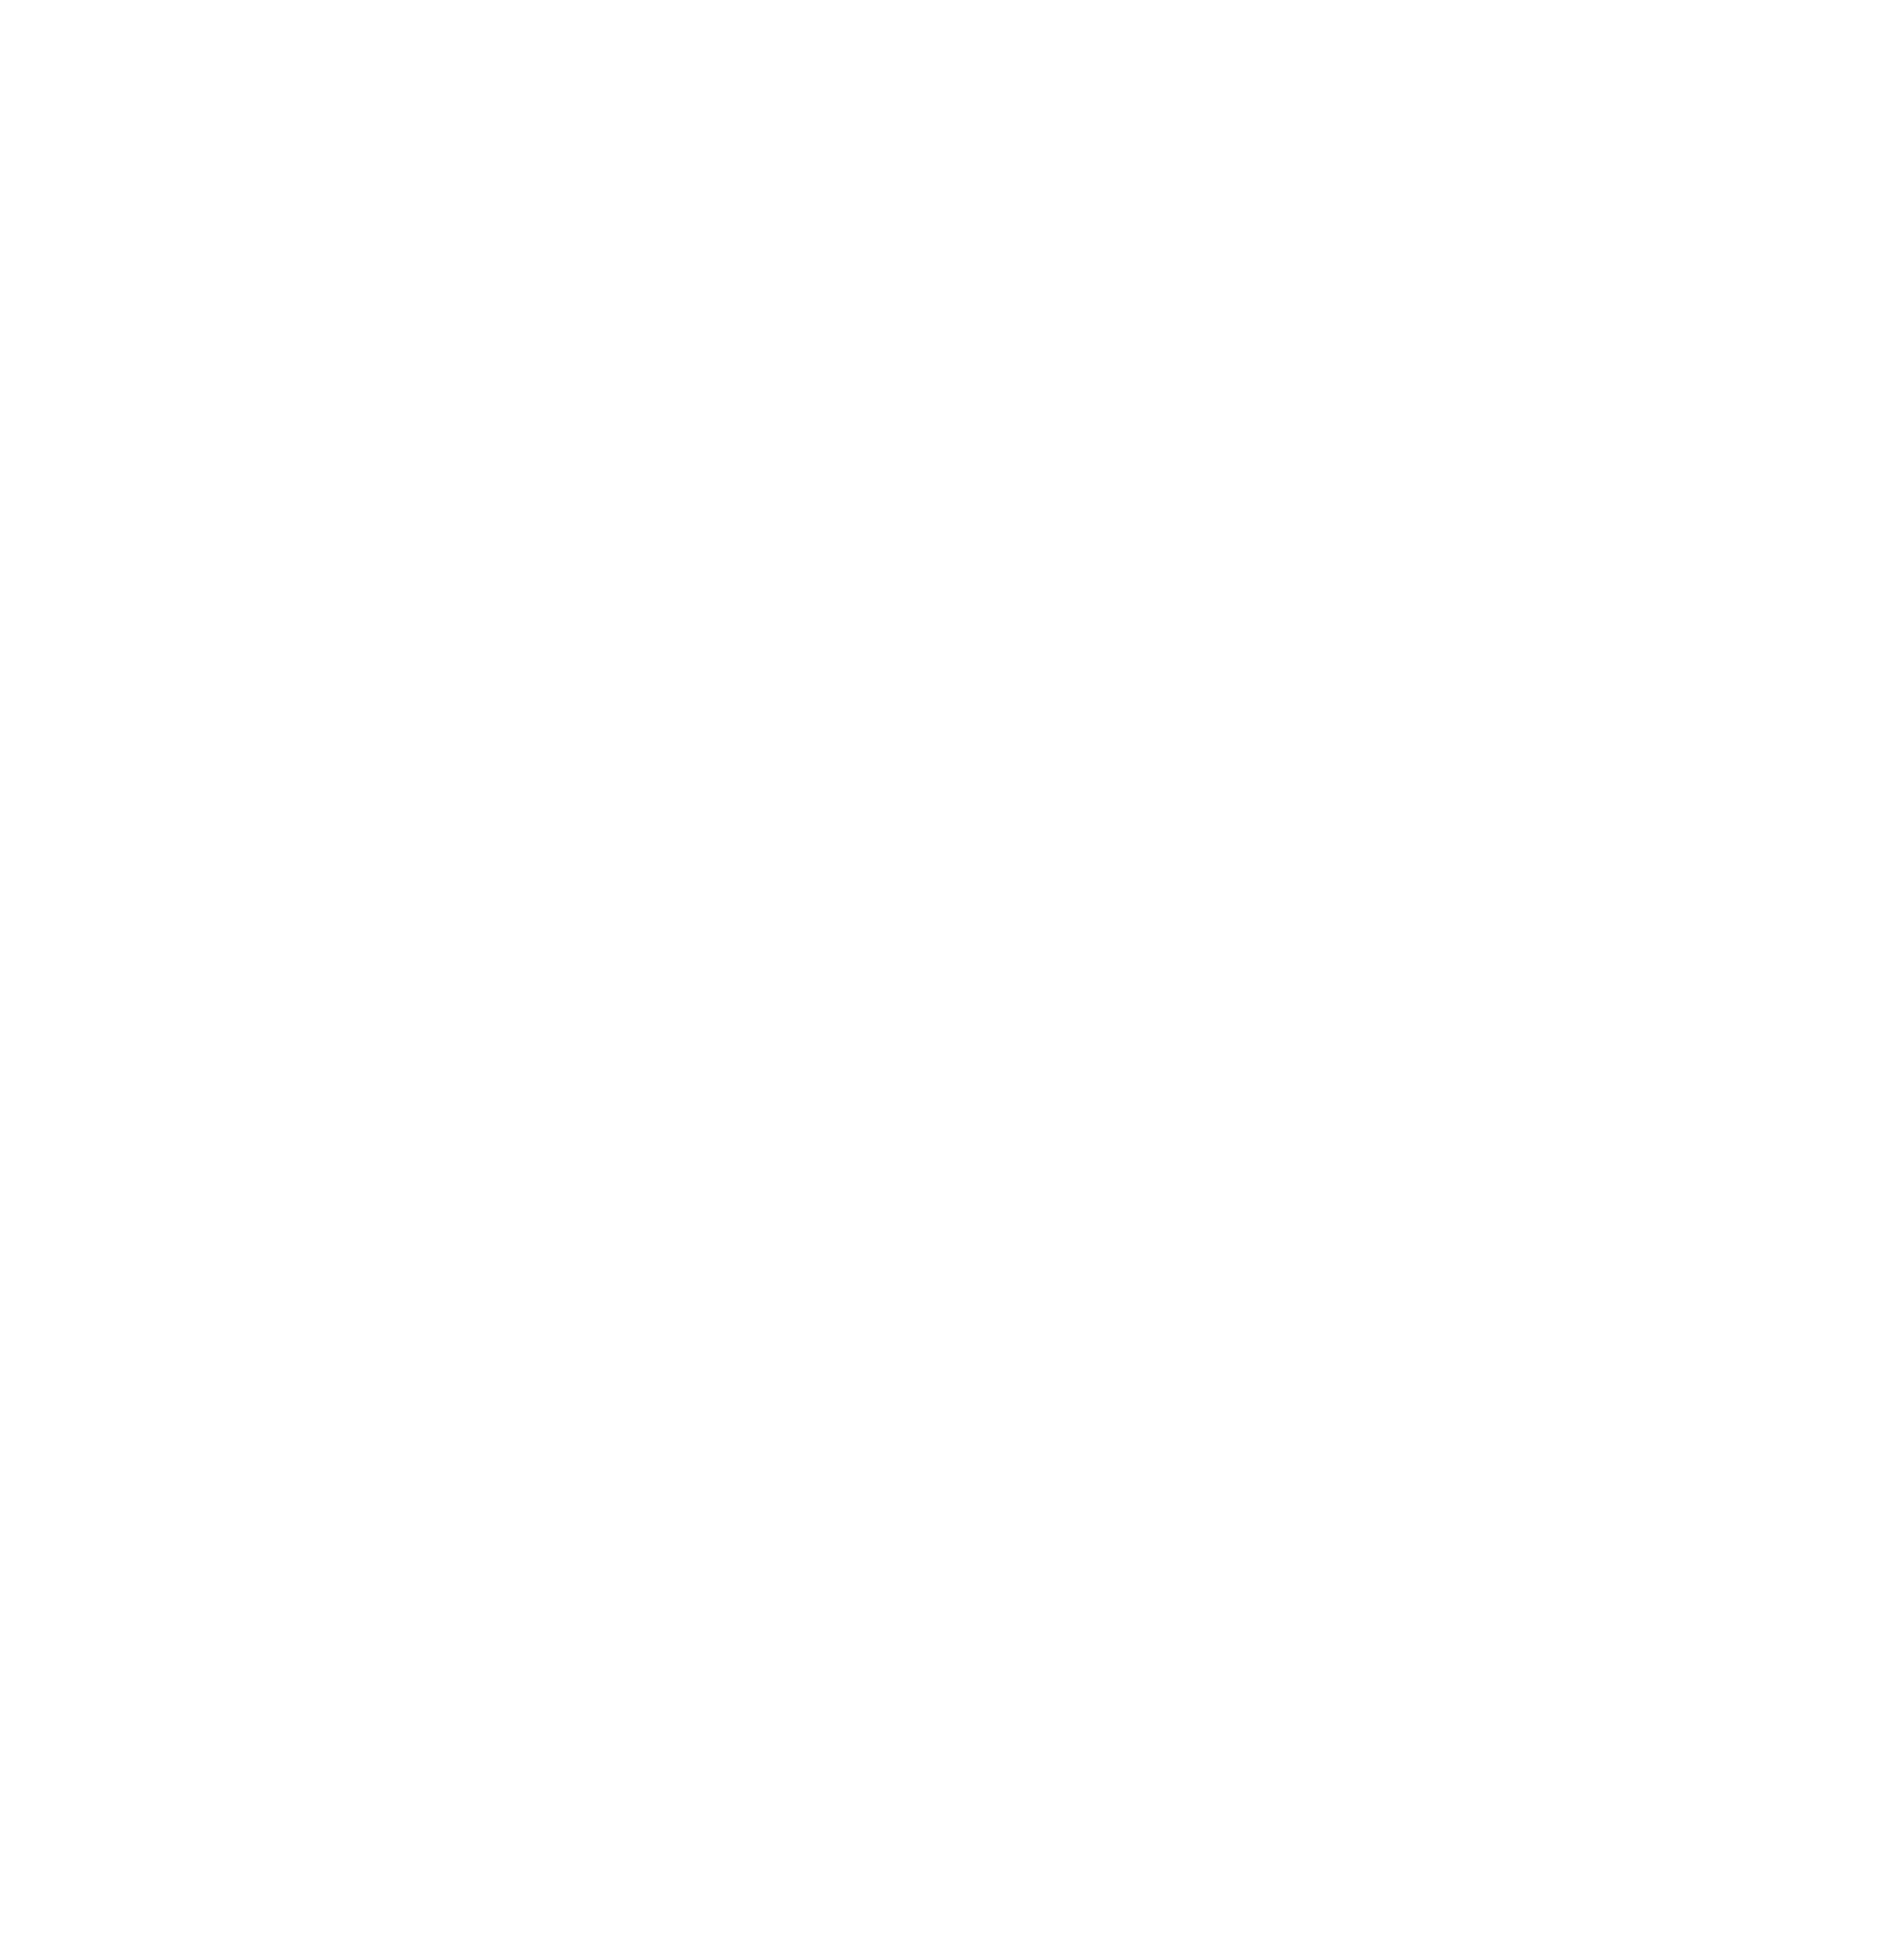

In [16]:
# for kaisai_date in tqdm(kaisai_date_list):
url = f"https://race.netkeiba.com/top/race_list.html?kaisai_date={kaisai_date}"
            # 予想外のエラーが起きたときなどにexceptに移る
headers = {
                # 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
                'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36'
                }
req = Request(url, headers=headers)
html = urlopen(req).read()
time.sleep(1)
soup = BeautifulSoup(html, "lxml")
soup

In [19]:
li_list = soup.find("li")
li_list
# for li in li_list:
#     race_id = re.findall(r"race_id=(\d{12)", li["href"])[0]

<li>
<a href="https://regist.netkeiba.com/?pid=premium&amp;rf=header">
<span>プレミアムサービス</span>
</a>
</li>

In [14]:
race_id_list = scraping.scrape_html_race_id_list(kaisai_date_list)

  0%|          | 0/9 [00:00<?, ?it/s]

stopped at https://race.netkeiba.com/top/race_list.html?kaisai_date=20240106
Traceback (most recent call last):
  File "/home/load0/競馬AI/keiba_race_ai/keiba_ai/common/src/scraping.py", line 136, in scrape_html_race_id_list
    li_list = soup.find("li", class_="RaceList_DataItem").find_all("a")
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'find_all'



In [17]:
race_id_list

[]

    notebookのモジュールのリロード

In [1]:
import scraping
%load_ext autoreload

In [4]:
race_id_list = scraping.scrape_race_id_list(kaisai_date_list[:10])

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
race_id_list

['202406010101',
 '202406010102',
 '202406010103',
 '202406010104',
 '202406010105',
 '202406010106',
 '202406010107',
 '202406010108',
 '202406010109',
 '202406010110',
 '202406010111',
 '202406010112',
 '202408010101',
 '202408010102',
 '202408010103',
 '202408010104',
 '202408010105',
 '202408010106',
 '202408010107',
 '202408010108',
 '202408010109',
 '202408010110',
 '202408010111',
 '202408010112',
 '202406010201',
 '202406010202',
 '202406010203',
 '202406010204',
 '202406010205',
 '202406010206',
 '202406010207',
 '202406010208',
 '202406010209',
 '202406010210',
 '202406010211',
 '202406010212',
 '202408010201',
 '202408010202',
 '202408010203',
 '202408010204',
 '202408010205',
 '202408010206',
 '202408010207',
 '202408010208',
 '202408010209',
 '202408010210',
 '202408010211',
 '202408010212',
 '202406010301',
 '202406010302',
 '202406010303',
 '202406010304',
 '202406010305',
 '202406010306',
 '202406010307',
 '202406010308',
 '202406010309',
 '202406010310',
 '202406010311

# レースidよりレース結果を取り出す

In [4]:
url = 'https://db.netkeiba.com/race/202306050911/'
headers = {
    # 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
    'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:115.0) Gecko/20100101 Firefox/115.0"
}

# Requestオブジェクトを作成
req = Request(url, headers=headers)

# リクエストを送信
response = urlopen(req)
html = response.read()

pd.read_html(html)[0]

,着 順,枠 番,馬 番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人 気,馬体重,調教師
0,1,7,13,レガレイラ,牝2,55,ルメール,2:00.2,NaN,3.1,1.0,454(-2),[東] 木村哲也
1,2,3,6,シンエンペラー,牡2,56,ムルザバ,2:00.3,3/4,3.1,2.0,482(+2),[西] 矢作芳人
2,3,3,5,サンライズジパング,牡2,56,菅原明良,2:00.6,2,128.7,13.0,512(-2),[西] 音無秀孝
3,4,2,4,アドミラルシップ,牡2,56,ドイル,2:00.7,3/4,69.2,11.0,460(+2),[東] 相沢郁
4,5,8,18,ミスタージーティー,牡2,56,坂井瑠星,2:00.7,アタマ,15.1,7.0,474(+2),[西] 矢作芳人
5,6,5,10,シリウスコルト,牡2,56,三浦皇成,2:00.8,クビ,29.7,9.0,480(+14),[東] 宗像義忠
6,7,6,11,ショウナンラプンタ,牡2,56,鮫島克駿,2:01.0,1.1/4,9.0,3.0,528(+8),[西] 高野友和
7,8,4,8,インザモーメント,牡2,56,佐々木大,2:01.0,クビ,92.5,12.0,486(+6),[西] 田中克典
8,9,6,12,ディスペランツァ,牡2,56,モリス,2:01.1,クビ,37.5,10.0,516(-6),[西] 吉岡辰弥
9,10,1,2,ヴェロキラプトル,牡2,56,戸崎圭太,2:01.5,2.1/2,14.3,5.0,468(+14),[西] 高野友和


In [12]:
# pickleフォルダより保存済みのレースidを取り出す
import pickle

with open("race_id_list.pickle", "rb") as f:
    race_id_list = pickle.load(f)

In [14]:
len(race_id_list)

3454

In [18]:
for race_id in race_id_list[:10]:
    url = f'https://db.netkeiba.com/race/{race_id}/'
#     headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
# }
#     req = Request(url, headers=headers)
#     response = urlopen(req)
#     html = response.read()
#     pd.read_html(html)[0]
    print(url)


https://db.netkeiba.com/race/202406010101/
https://db.netkeiba.com/race/202406010102/
https://db.netkeiba.com/race/202406010103/
https://db.netkeiba.com/race/202406010104/
https://db.netkeiba.com/race/202406010105/
https://db.netkeiba.com/race/202406010106/
https://db.netkeiba.com/race/202406010107/
https://db.netkeiba.com/race/202406010108/
https://db.netkeiba.com/race/202406010109/
https://db.netkeiba.com/race/202406010110/


In [16]:
html

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ja" xml:lang="ja" id="html">\n<head>\n\n<title>\xa5\xdb\xa1\xbc\xa5\xd7\xa5\xd5\xa5\xeb\xa5\xb9\xa5\xc6\xa1\xbc\xa5\xaf\xa5\xb9\xa1\xc32023\xc7\xaf12\xb7\xee28\xc6\xfc | \xb6\xa5\xc7\xcf\xa5\xc7\xa1\xbc\xa5\xbf\xa5\xd9\xa1\xbc\xa5\xb9 - netkeiba</title>\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<meta http-equiv="content-language" content="ja" />\n<meta http-equiv="content-type" content="text/html; charset=euc-jp" />\n<meta http-equiv="content-script-type" content="text/javascript" />\n<meta http-equiv="content-style-type" content="text/css" />\n<meta name="description" content="netkeiba\xa4\xac\xb8\xd8\xa4\xeb\xb9\xf1\xc6\xe2\xba\xc7\xc2\xe7\xb5\xe9\xa4\xce\xb6\xa5\xc7\xcf\xa5\xc7\xa1\xbc\xa5\xbf\xa5\xd9\xa1\xbc\xa5\xb9\xa4\xc7\xa4\xb9\xa1\xa350\xcb\xfc\xc6\xac\xb0\xca\xbe\xe5\xa4\xce\xb6

In [24]:
# 馬名やジョッキーidを後々活用するためにレーステーブルのhtmlを保存
with open("202306050911.bin", "wb") as f:
    f.write(html)

In [22]:
mkdir ..\data

In [7]:
# OSごとにPath表記が異なるのは面倒なのでpathlibを使う
from pathlib import Path

HTML_DIR = Path("..","data","html")
HTML_DIR

WindowsPath('../data/html')

In [8]:
HTML_DIR/"202306050911.bin"

WindowsPath('../data/html/202306050911.bin')

In [35]:
# レースページのhtmlデータをhtmlディレクトリに格納
for race_id in race_id_list[:5]:
    url = f'https://db.netkeiba.com/race/{race_id}/'
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}
    req = Request(url, headers=headers)
    response = urlopen(req)
    html = response.read()
    time.sleep(1)
    with open(html_dir / f"{race_id}.bin", "wb") as f:
        f.write(html)


In [32]:
# 上記コードを関数化
# 関数外で定義されたhtml_dirを使用するとわかりにくいのでPathであることを明記してあげる

def scrape_html_race(race_id_list, save_dir:Path):
    html_path_list = []
    for race_id in tqdm(race_id_list):
        filepath = save_dir / f"{race_id}.bin"
        # binファイルが既に存在するときスキップするコードも組み込む
        if filepath.is_file():
            print(f"skipped:{race_id}")
        else:
            url = f'https://db.netkeiba.com/race/{race_id}/'
            headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
        }
            req = Request(url, headers=headers)
            response = urlopen(req)
            html = response.read()
            time.sleep(1)
            with open(filepath, "wb") as f:
                f.write(html)
            html_path_list.append(filepath)
    return html_path_list
        
    

In [52]:
html_path_list = scrape_html_race(race_id_list[:14], save_dir=html_dir)

  0%|          | 0/14 [00:00<?, ?it/s]

skipped:202406010101
skipped:202406010102
skipped:202406010103
skipped:202406010104
skipped:202406010105
skipped:202406010106
skipped:202406010107
skipped:202406010108
skipped:202406010109
skipped:202406010110
skipped:202406010111


In [47]:
html_path_list

[WindowsPath('../競馬ai/data/html/202406010101.bin'),
 WindowsPath('../競馬ai/data/html/202406010102.bin'),
 WindowsPath('../競馬ai/data/html/202406010103.bin'),
 WindowsPath('../競馬ai/data/html/202406010104.bin'),
 WindowsPath('../競馬ai/data/html/202406010105.bin'),
 WindowsPath('../競馬ai/data/html/202406010106.bin'),
 WindowsPath('../競馬ai/data/html/202406010107.bin'),
 WindowsPath('../競馬ai/data/html/202406010108.bin'),
 WindowsPath('../競馬ai/data/html/202406010109.bin'),
 WindowsPath('../競馬ai/data/html/202406010110.bin')]

In [50]:
#ファイルが存在するとき、Trueを返す
html_path_list[0].is_file()

True

In [38]:
HTML_RACE_DIR = HTML_DIR / "race"
HTML_RACE_DIR

WindowsPath('../data/html/race')

In [37]:
# glob関数でhtmlPathを取得
html_path_race = list(HTML_RACE_DIR.glob("*"))

In [36]:
len(html_path_race)

3454

#  各馬の過去成績テーブルの作成

## レースidのインデックスを追加する

In [47]:
dfs = {} #辞書型
for html_path in html_path_race[:3]:
    with open(html_path, "rb") as f:
        race_id = html_path.stem  # stemで拡張子なしのファイル名を取得
        html = f.read()
        df = pd.read_html(html)[0]
        df.index = [race_id]*len(df)
        dfs[race_id] = df
        # break
        

In [45]:
dfs['202401010102']

,着 順,枠 番,馬 番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人 気,馬体重,調教師
0,1,2,2,タミゼ,牝3,55,北村友一,0:59.5,NaN,3.9,2,474(-2),[西] 平田修
1,2,5,6,タマモアルタイル,牡3,57,武豊,1:00.0,3,9.4,6,494(+4),[東] 水野貴広
2,3,6,8,ウィスピースノー,牝3,54,角田大河,1:00.1,クビ,44.4,9,434(0),[西] 今野貞一
3,4,6,7,スキーサンダー,牝3,52,小林勝太,1:00.1,クビ,3.9,1,474(-2),[東] 辻哲英
4,5,7,10,ゴールドタリスマン,牝3,55,武藤雅,1:00.2,クビ,90.0,10,424(+8),[東] 稲垣幸雄
5,6,3,3,コパマエチャン,牝3,52,長浜鴻緒,1:00.2,アタマ,16.0,8,476(0),[東] 大和田成
6,7,4,4,スリーボビー,牡3,57,永野猛蔵,1:00.2,クビ,14.1,7,482(-4),[東] 伊藤圭三
7,8,8,12,メトゥス,牡3,57,佐々木大,1:00.4,1,6.1,4,458(+6),[東] 堀内岳志
8,9,7,9,ブートストラップ,セ3,54,川端海翼,1:01.1,4,167.0,11,486(-6),[東] 本間忍
9,10,8,11,クミンフレイバー,牝3,55,鮫島克駿,1:01.2,1/2,8.2,5,438(+4),[東] 松永康利


In [49]:
['202401010102']*len(df)

['202401010102',
 '202401010102',
 '202401010102',
 '202401010102',
 '202401010102',
 '202401010102',
 '202401010102',
 '202401010102',
 '202401010102',
 '202401010102',
 '202401010102',
 '202401010102',
 '202401010102',
 '202401010102']

In [50]:
#辞書型だと使いにくいのでリストをつなげてあげる
pd.concat(dfs.values())

,着 順,枠 番,馬 番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人 気,馬体重,調教師
202401010101,1,5,5,ポッドベイダー,牡2,55,佐々木大,1:08.8,NaN,1.2,1,462(-2),[東] 上原佑紀
202401010101,2,2,2,ニシノクードクール,牝2,55,武藤雅,1:09.1,1.3/4,10.2,4,452(-2),[東] 武藤善則
202401010101,3,3,3,ロードヴェルト,牡2,55,横山武史,1:09.4,1.3/4,7.9,3,416(+6),[西] 牧浦充徳
202401010101,4,1,1,ルージュアマリア,牝2,55,永野猛蔵,1:10.0,3.1/2,5.9,2,410(+6),[東] 黒岩陽一
202401010101,5,4,4,ロードヴァルカン,牡2,54,角田大河,1:10.1,クビ,21.3,5,438(-2),[西] 中村直也
202401010102,1,2,2,タミゼ,牝3,55,北村友一,0:59.5,NaN,3.9,2,474(-2),[西] 平田修
202401010102,2,5,6,タマモアルタイル,牡3,57,武豊,1:00.0,3,9.4,6,494(+4),[東] 水野貴広
202401010102,3,6,8,ウィスピースノー,牝3,54,角田大河,1:00.1,クビ,44.4,9,434(0),[西] 今野貞一
202401010102,4,6,7,スキーサンダー,牝3,52,小林勝太,1:00.1,クビ,3.9,1,474(-2),[東] 辻哲英
202401010102,5,7,10,ゴールドタリスマン,牝3,55,武藤雅,1:00.2,クビ,90.0,10,424(+8),[東] 稲垣幸雄


In [51]:
dfs = {} #辞書型
for html_path in html_path_race[:3]:
    with open(html_path, "rb") as f:
        race_id = html_path.stem  # stemで拡張子なしのファイル名を取得
        html = f.read()
        df = pd.read_html(html)[0]
        df.index = [race_id]*len(df)
        dfs[race_id] = df
concat_df = pd.concat(dfs.values())
concat_df.index.name = "race_id"


In [52]:
concat_df

,着 順,枠 番,馬 番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人 気,馬体重,調教師
race_id,,,,,,,,,,,,,
202401010101,1,5,5,ポッドベイダー,牡2,55,佐々木大,1:08.8,NaN,1.2,1,462(-2),[東] 上原佑紀
202401010101,2,2,2,ニシノクードクール,牝2,55,武藤雅,1:09.1,1.3/4,10.2,4,452(-2),[東] 武藤善則
202401010101,3,3,3,ロードヴェルト,牡2,55,横山武史,1:09.4,1.3/4,7.9,3,416(+6),[西] 牧浦充徳
202401010101,4,1,1,ルージュアマリア,牝2,55,永野猛蔵,1:10.0,3.1/2,5.9,2,410(+6),[東] 黒岩陽一
202401010101,5,4,4,ロードヴァルカン,牡2,54,角田大河,1:10.1,クビ,21.3,5,438(-2),[西] 中村直也
202401010102,1,2,2,タミゼ,牝3,55,北村友一,0:59.5,NaN,3.9,2,474(-2),[西] 平田修
202401010102,2,5,6,タマモアルタイル,牡3,57,武豊,1:00.0,3,9.4,6,494(+4),[東] 水野貴広
202401010102,3,6,8,ウィスピースノー,牝3,54,角田大河,1:00.1,クビ,44.4,9,434(0),[西] 今野貞一
202401010102,4,6,7,スキーサンダー,牝3,52,小林勝太,1:00.1,クビ,3.9,1,474(-2),[東] 辻哲英


In [ ]:
# 関数化
def tabel_results(html_path_list: list[Path]) -> pd.DataFrame:
    dfs = {} #辞書型
    for html_path in tqdm(html_path_list):
        with open(html_path, "rb") as f:
            race_id = html_path.stem  # stemで拡張子なしのファイル名を取得
            html = f.read()
            df = pd.read_html(html)[0]
            df.index = [race_id]*len(df)
            dfs[race_id] = df
    concat_df = pd.concat(dfs.values())
    concat_df.index.name = "race_id"
    return concat_df
    

In [56]:
results =tabel_results(html_path_list=html_path_race)

  0%|          | 0/3454 [00:00<?, ?it/s]

IndexError: list index out of range

## horse_id等々を列に追加するために、保存済みのレースhtmlから要素を抽出。やり方はウェブスクレイピングの際とほぼ同プロセス。
    

In [59]:
url = 'https://race.netkeiba.com/race/result.html?race_id=202401010101&rf=race_list'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

req = Request(url, headers=headers)
# リクエストを送信
response = urlopen(req)
html = response.read()

pd.read_html(html)[2]

,0,1,2,3
0,ワイド,2 5 3 5 2 3,190円 150円 440円,3人気2人気7人気
1,馬単,5 2,610円,3人気
2,3連複,2 3 5,620円,4人気
3,3連単,5 2 3,"1,560円",6人気


## javascriptよりdrivemangerを使用

In [60]:
driver_path = ChromeDriverManager().install()
driver = webdriver.Chrome(service=Service(driver_path))
driver.get(url)


In [64]:
from  selenium.webdriver.common.by import By
table_list = driver.find_elements(By.CLASS_NAME, "Shutuba_Table RaceTable01 ShutubaTable tablesorter tablesorter-default")

[]

In [88]:
href = table.find_elements(By.TAG_NAME, "a").get_attribute("href")
href
horse_links = re.search(r"/horse/", href)
href


'https://db.netkeiba.com/horse/2021105821'

In [49]:
re.findall(r"\d{10}",href)[0]

'2021105821'

In [75]:
horse_id_list = []
for a in horse_list:
    href = horse_list.find_element(By.TAG_NAME, "a").get_attribute("href")
    horse_id = re.findall(r"\d{10}",href)[0]
    # print(horse_id)
    horse_id_list.append(horse_id)
    

TypeError: 'WebElement' object is not iterable

## なんやかんやうまくいかなくて、bsでやってみたらいけたので切り替えした

In [30]:
soup = BeautifulSoup(html, "lxml")

In [29]:
desk = soup.find("div",class_="RaceColumn02")

In [30]:
desk

In [27]:
desk.find_all("a")

AttributeError: 'NoneType' object has no attribute 'find_all'

In [22]:
# /horse/で始まるhrefを取得する
a_list = desk.find_all("a", href=re.compile(r"/horse/"))
a_list

[<a href="https://db.netkeiba.com/horse/2021105821" target="_blank" title="サンディブロンド">サンディブロンド</a>,
 <a href="https://db.netkeiba.com/horse/2021106805" target="_blank" title="マイネルディレクト">マイネルディレクト</a>,
 <a href="https://db.netkeiba.com/horse/2021102685" target="_blank" title="セイウンチドリ">セイウンチドリ</a>,
 <a href="https://db.netkeiba.com/horse/2021100328" target="_blank" title="グリントリッター">グリントリッター</a>,
 <a href="https://db.netkeiba.com/horse/2021102752" target="_blank" title="マニーブルース">マニーブルース</a>,
 <a href="https://db.netkeiba.com/horse/2021100402" target="_blank" title="ニシノリピート">ニシノリピート</a>,
 <a href="https://db.netkeiba.com/horse/2021104782" target="_blank" title="ミッキードラマー">ミッキードラマー</a>,
 <a href="https://db.netkeiba.com/horse/2021103105" target="_blank" title="イデアガウディ">イデアガウディ</a>,
 <a href="https://db.netkeiba.com/horse/2021101169" target="_blank" title="サナダ">サナダ</a>,
 <a href="https://db.netkeiba.com/horse/2021102792" target="_blank" title="クインタレッリ">クインタレッリ</a>,
 <a href="https://db.netkeib

In [26]:
a = a_list[0]
a

<a href="https://db.netkeiba.com/horse/2021105821" target="_blank" title="サンディブロンド">サンディブロンド</a>

In [27]:
re.findall(r"\d{10}",a["href"])[0]

'2021105821'

In [118]:
for a in a_list:
    horse_id = re.findall(r"\d{10}",a["href"])[0]
    # print(horse_id)
    horse_id_list.append(horse_id)
    

In [119]:
len(horse_id_list)

16

In [120]:
horse_id_list[:3]

['2021105821', '2021106805', '2021102685']

In [4]:
import create_table
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
%load_ext autoreload

In [8]:
from pathlib import Path
HTML_RACE_DIR = Path("..","data","html","race")
html_path_race = list(HTML_RACE_DIR.glob("*.bin"))

In [42]:
html_path_race[:3]

[WindowsPath('../data/html/race/202401010101.bin'),
 WindowsPath('../data/html/race/202401010102.bin'),
 WindowsPath('../data/html/race/202401010103.bin')]

In [43]:
for html_path in tqdm(html_path_race[:2]):
    with open(html_path, "rb") as f:
        html = f.read()
        soup = BeautifulSoup(html, "lxml")
        desk = soup.find("table",class_="Shutuba_Table RaceTable01 ShutubaTable tablesorter tablesorter-default")

  0%|          | 0/2 [00:00<?, ?it/s]

In [44]:
desk

In [32]:
#エラー内容はclassの内容が存在していないためsoupの中身が空
results = create_table.table_results(html_path_race[:2])

  0%|          | 0/2 [00:00<?, ?it/s]

HTML content for ..\data\html\race\202401010101.bin:
b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ja" xml:lang="ja" id="html">\n<head>\n\n<title>2\xba\xd0\xcc\xa4\xbe\xa1\xcd\xf8\xa1\xc32024\xc7\xaf7\xb7\xee20\xc6\xfc | \xb6\xa5\xc7\xcf\xa5\xc7\xa1\xbc\xa5\xbf\xa5\xd9\xa1\xbc\xa5\xb9 - netkeiba</title>\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<meta http-equiv="content-language" content="ja" />\n<meta http-equiv="content-type" content="text/html; charset=euc-jp" />\n<meta http-equiv="content-script-t'
Error processing ..\data\html\race\202401010101.bin
Traceback (most recent call last):
  File "C:\Users\Onoe Daichi\PycharmProjects\pythonProject\競馬ai\src\create_table.py", line 30, in table_results
    a_list = soup.find_all("a", href=re.compile(r"/horse/"))
             ^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute

ValueError: No objects to concatenate

## ２０２４年はレースページにおいてレース会場ごとにレースタグが異なる場合がるので後回し。２０２３年から抽出を行う。

In [66]:
import create_table
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
%autoreload

In [68]:
from pathlib import Path
HTML_RACE_DIR = Path("..","data","html","race_test")
html_path_race = list(HTML_RACE_DIR.glob("*.bin"))

In [69]:
html_path_race[:3]

[WindowsPath('../data/html/race_test/202301010101.bin'),
 WindowsPath('../data/html/race_test/202301010102.bin'),
 WindowsPath('../data/html/race_test/202301010103.bin')]

In [80]:
# tableタグのclassの"RaceTable01 RaceCommon_Table ResultRefund Table_Show_All"が保存したhtml上に存在しなかったため(デベロッパーツール上では確認済)、
# 保存済みhtmlの中身から確認できたclass_="race_table_01 nk_tb_common"より馬データ抽出を仮実施

for html_path in tqdm(html_path_race[:1]):
    with open(html_path, "rb") as f:
        html = f.read()
        soup = BeautifulSoup(html, "lxml") .find("table",class_="race_table_01 nk_tb_common")
        


  0%|          | 0/1 [00:00<?, ?it/s]

In [77]:
soup

<table cellpadding="0" cellspacing="1" class="race_table_01 nk_tb_common" summary="レース結果">
<tr class="txt_c">
<th nowrap="nowrap">着<br/>順</th>
<th nowrap="nowrap">枠<br/>番</th>
<th nowrap="nowrap">馬<br/>番</th>
<th nowrap="nowrap">馬名</th>
<th nowrap="nowrap">性齢</th>
<th nowrap="nowrap">斤量</th>
<th nowrap="nowrap">騎手</th>
<th nowrap="nowrap">タイム</th>
<th nowrap="nowrap">着差</th>
<diary_snap_cut>
<th nowrap="nowrap">ﾀｲﾑ<br/>指数<br/><img height="16" src="https://cdn.netkeiba.com/img.db//style/netkeiba.ja/image/ico_premium.gif" width="16"/></th>
<th nowrap="nowrap">通過</th>
<th nowrap="nowrap">上り</th>
</diary_snap_cut>
<th nowrap="nowrap">単勝</th>
<th nowrap="nowrap">人<br/>気</th>
<th nowrap="nowrap">馬体重</th>
<diary_snap_cut>
<th nowrap="nowrap">調教<br/>ﾀｲﾑ<br/><img height="16" src="https://cdn.netkeiba.com/img.db//style/netkeiba.ja/image/ico_premium.gif" width="16"/></th>
<th nowrap="nowrap">厩舎<br/>ｺﾒﾝﾄ<br/><img height="16" src="https://cdn.netkeiba.com/img.db//style/netkeiba.ja/image/ico_premium

In [93]:
a_list = soup.find_all("a", href=re.compile(r"/owner/"))
a_list

[<a href="/owner/result/recent/425031/" title="田代洋己">田代洋己</a>,
 <a href="/owner/result/recent/372033/" title="熊木浩">熊木浩</a>,
 <a href="/owner/result/recent/464030/" title="田畑利彦">田畑利彦</a>,
 <a href="/owner/result/recent/680031/" title="カカムーチョレーシング">カカムーチョレーシング</a>,
 <a href="/owner/result/recent/281008/" title="水上ふじ子">水上ふじ子</a>,
 <a href="/owner/result/recent/170800/" title="ロードホースクラブ">ロードホースクラブ</a>,
 <a href="/owner/result/recent/320803/" title="古賀禎彦">古賀禎彦</a>,
 <a href="/owner/result/recent/379803/" title="ＯＵＭＡ">ＯＵＭＡ</a>]

In [81]:
a = a_list[0]
a

<a href="/horse/2021101429/" id="umalink_202301010101" title="サトミノキラリ">サトミノキラリ</a>

In [82]:
re.findall(r"\d{10}",a["href"])[0]

'2021101429'

In [84]:
horse_id_list =[]
for a in a_list:
    horse_id = re.findall(r"\d{10}",a["href"])[0]
    # print(horse_id)
    horse_id_list.append(horse_id)

In [87]:
len(horse_id_list)

8

In [88]:
from pathlib import Path
HTML_RACE_DIR = Path("..","data","html","race_test")
html_path_race = list(HTML_RACE_DIR.glob("*.bin"))

In [137]:
html_path_race[:3]

[WindowsPath('../data/html/race_test/202301010101.bin'),
 WindowsPath('../data/html/race_test/202301010102.bin'),
 WindowsPath('../data/html/race_test/202301010103.bin')]

In [113]:
results = create_table.table_results(html_path_race[:5])

  0%|          | 0/5 [00:00<?, ?it/s]

In [98]:
results

,着 順,枠 番,馬 番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人 気,馬体重,調教師,horse_id,jockey_id,trainer_id,owner_id
race_id,,,,,,,,,,,,,,,,,
202301010101,1,5,5,サトミノキラリ,牡2,55,横山武史,1:09.5,NaN,1.2,1,452(-4),[東] 鈴木伸尋,2021101429,01170,01026,01026
202301010101,2,8,8,ベアゴーゴー,牝2,55,浜中俊,1:09.5,クビ,4.1,2,454(+2),[東] 杉浦宏昭,2021105872,01115,01008,01008
202301010101,3,6,6,ハピアーザンエバー,牡2,55,藤岡佑介,1:10.0,2.1/2,59.9,6,438(-6),[西] 羽月友彦,2021106854,01093,01091,01091
202301010101,4,4,4,デビルシズカチャン,牝2,55,ルメール,1:10.2,1.1/2,16.6,3,450(+2),[西] 武幸四郎,2021105553,05339,01160,01160
202301010101,5,1,1,ウィスピースノー,牝2,55,吉田隼人,1:10.3,1/2,23.9,5,434(-10),[西] 今野貞一,2021100648,01095,01128,01128
202301010101,6,2,2,ロードスタウト,牡2,55,鮫島克駿,1:10.7,2.1/2,61.8,7,454(-6),[西] 中村直也,2021100159,01157,01186,01186
202301010101,7,3,3,コミックガール,牝2,53,佐々木大,1:10.9,1.1/4,18.8,4,404(-2),[東] 上原佑紀,2021100265,01197,01192,01192
202301010101,8,7,7,ヒポカンポ,牝2,52,小林勝太,1:11.9,6,251.3,8,394(-2),[東] 伊藤圭三,2021103762,01205,01023,01023
202301010102,1,7,9,クリーデンス,牝3,54,ルメール,0:58.7,NaN,2.4,1,496(+12),[西] 吉村圭司,2020106547,05339,01130,01130


In [99]:

results.isnull().sum()

着 順           0
枠 番           0
馬 番           0
馬名            0
性齢            0
斤量            0
騎手            0
タイム           0
着差            3
単勝            0
人 気           0
馬体重           0
調教師           0
horse_id      0
jockey_id     0
trainer_id    0
owner_id      0
dtype: int64

In [101]:
results.columns = results.columns.str.replace(" ","")

In [102]:
results.columns

Index(['着順', '枠番', '馬番', '馬名', '性齢', '斤量', '騎手', 'タイム', '着差', '単勝', '人気',
       '馬体重', '調教師', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id'],
      dtype='object')

In [106]:
save_dir = Path("..","data","rawdf")
save_dir.mkdir()

In [108]:
results.to_csv(save_dir / "results.csv", sep="\t")

In [117]:
horse_id_list = results["horse_id"].unique()
horse_id_list

array(['2021101429', '2021105872', '2021106854', '2021105553',
       '2021100648', '2021100159', '2021100265', '2021103762',
       '2020106547', '2020100879', '2020100391', '2020104346',
       '2020102908', '2020100551', '2020105380', '2020104250',
       '2020104087', '2020106395', '2020107102', '2020101946',
       '2020104215', '2020103939', '2020102347', '2020105632',
       '2020103126', '2020100863', '2020105061', '2020101252',
       '2020101681', '2020102875', '2020105472', '2020106970',
       '2020100036', '2020101849', '2020105354', '2020103018',
       '2020105782', '2020102563', '2020103346', '2020105792',
       '2020105059', '2020104015', '2020105587', '2020103104',
       '2020106011', '2020104556', '2020106487', '2021106689',
       '2021103728', '2021104889', '2021101661', '2021103385',
       '2021102150', '2021107255', '2021102855', '2021102825',
       '2021101598'], dtype=object)

In [119]:
len(horse_id_list)

57

In [121]:

import scraping

In [123]:
html_path_horse = scraping.scrape_html_horse(horse_id_list=horse_id_list)



  0%|          | 0/57 [00:00<?, ?it/s]

In [125]:
len(html_path_horse)

57

In [3]:
# スクレイピングできたので、horseページのhtmlからテーブルを作製
%autoreload

UsageError: Line magic function `%autoreload` not found.


In [134]:
horse_results = create_table.table_horse_results(html_path_list=html_path_horse)

  0%|          | 0/57 [00:00<?, ?it/s]

In [135]:
horse_results

,日付,開催,天気,R,レース名,映像,頭数,枠番,馬番,オッズ,...,着差,ﾀｲﾑ指数,通過,ペース,上り,馬体重,厩舎ｺﾒﾝﾄ,備考,勝ち馬(2着馬),賞金
horse_id,,,,,,,,,,,,,,,,,,,,,
2021101429,2024/11/09,5東京3,晴,10,奥多摩S(3勝クラス),NaN,14,5,8,3.8,...,0.2,**,7-5,35.4-34.4,33.7,458(+2),NaN,NaN,セントメモリーズ,NaN
2021101429,2024/10/06,4東京2,曇,8,3歳以上2勝クラス,NaN,13,6,8,1.9,...,-0.5,**,6-6,33.8-34.5,33.8,456(-2),NaN,NaN,(ニコラウス),1140.0
2021101429,2024/09/01,3新潟8,晴,9,飯豊特別(2勝クラス),NaN,7,7,7,3.0,...,0.4,**,4-4,35.2-34.4,34.4,458(-2),NaN,NaN,セントメモリーズ,625.2
2021101429,2024/08/10,3新潟1,晴,10,新発田城特別(2勝クラス),NaN,14,8,13,11.3,...,0.0,**,10-10,33.5-35.0,33.9,460(-4),NaN,NaN,サクセスアイ,629.2
2021101429,2024/04/06,3中山5,曇,11,ニュージーランドT(GII),NaN,16,8,16,75.3,...,0.9,**,14-16-16,36.0-35.5,34.9,464(0),NaN,NaN,エコロブルーム,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021101598,2023/12/10,4中京4,晴,4,2歳未勝利,NaN,16,6,11,59.7,...,-0.3,**,3-3,34.5-35.2,34.8,468(+20),NaN,NaN,(ブルボンクイーン),550.0
2021101598,2023/09/24,4阪神7,晴,2,2歳未勝利,NaN,9,7,7,52.8,...,1.3,**,1-2,35.3-33.9,35.2,448(-6),NaN,NaN,ナムラエイハブ,NaN
2021101598,2023/09/03,2札幌8,晴,1,2歳未勝利,NaN,11,8,10,55.1,...,1.1,**,8-6-5,30.2-36.4,36.8,454(+2),NaN,NaN,ラーンザロープス,NaN


In [136]:
horse_id_list=results["horse_id"].unique()
horse_id_list

array(['2021101429', '2021105872', '2021106854', '2021105553',
       '2021100648', '2021100159', '2021100265', '2021103762',
       '2020106547', '2020100879', '2020100391', '2020104346',
       '2020102908', '2020100551', '2020105380', '2020104250',
       '2020104087', '2020106395', '2020107102', '2020101946',
       '2020104215', '2020103939', '2020102347', '2020105632',
       '2020103126', '2020100863', '2020105061', '2020101252',
       '2020101681', '2020102875', '2020105472', '2020106970',
       '2020100036', '2020101849', '2020105354', '2020103018',
       '2020105782', '2020102563', '2020103346', '2020105792',
       '2020105059', '2020104015', '2020105587', '2020103104',
       '2020106011', '2020104556', '2020106487', '2021106689',
       '2021103728', '2021104889', '2021101661', '2021103385',
       '2021102150', '2021107255', '2021102855', '2021102825',
       '2021101598'], dtype=object)

In [2]:
%autoreload

UsageError: Line magic function `%autoreload` not found.


In [7]:
mkdir ..\..\3.0.0

In [4]:
DATA_DIR = Path("..","data")
HTML_DIR = DATA_DIR/ "html"
HTML_RACE_DIR = HTML_DIR/ "race_test"

In [5]:
html_path_list = list(HTML_RACE_DIR.glob("*.bin"))

In [7]:
html_path_list[0]

WindowsPath('../data/html/race_test/202301010101.bin')

In [8]:
with open (html_path_list[0], "rb") as f:
    html = f.read()
    soup = BeautifulSoup(html, "lxml")

In [ ]:
info_soup =soup.find("div", class_="data_intro")

In [11]:
info_soup

<div class="data_intro">
<dl class="racedata fc">
<dt>
1 R
</dt>
<dd>
<h1>2歳未勝利<!--img src="style/netkeiba.ja/image/race_grade_g2_01.png" alt=""--></h1>
<p>
<diary_snap_cut>
<span>芝右1200m / 天候 : 晴 / 芝 : 良 / 発走 : 09:50</span><br/>
<diary_snap_cut>
</diary_snap_cut>
</diary_snap_cut></p>
</dd>
</dl>
<p class="smalltxt">2023年7月22日 1回札幌1日目 2歳未勝利  (混)[指](馬齢)</p>
<diary_snap_cut>
<ul class="btn_link_list fc">
<li class="race_btn_MOVIE end">
<a href="/race/movie/202301010101"><img alt="レース映像" class="imgover" src="https://cdn.netkeiba.com/img.db//style/netkeiba.ja/image/race_btn_movie_on.png"/></a>
</li>
</ul>
</diary_snap_cut>
</div>

In [12]:
info_soup.find("h1").text

'2歳未勝利'

In [61]:
# pタグの1，2個目の内容が分かる
info_allp = info_soup.find_all("p")
info_allp

[<p>
 <diary_snap_cut>
 <span>芝右1200m / 天候 : 晴 / 芝 : 良 / 発走 : 09:50</span><br/>
 <diary_snap_cut>
 </diary_snap_cut>
 </diary_snap_cut></p>,
 <p class="smalltxt">2023年7月22日 1回札幌1日目 2歳未勝利  (混)[指](馬齢)</p>]

In [60]:
# replace(" ","")でスペースを削除
info_p = info_soup.find_all("p")
info_p = info_soup.find("p").text.replace(" ","")
info_p


[<p>
 <diary_snap_cut>
 <span>芝右1200m / 天候 : 晴 / 芝 : 良 / 発走 : 09:50</span><br/>
 <diary_snap_cut>
 </diary_snap_cut>
 </diary_snap_cut></p>,
 <p class="smalltxt">2023年7月22日 1回札幌1日目 2歳未勝利  (混)[指](馬齢)</p>]

In [21]:
# \wと:を含む文字列を取り出す
re.findall(r"[\w:]+",info_p)   

['芝右1200m', '天候:晴', '芝:良', '発走:09:50']

In [55]:
# 例えば芝晴のような文字列を取り出す
# re.findall(r"[芝晴]+",info_p)
info_p = info_soup.find_all("p")[0].text.replace(" ","")
re.findall(r"[\w:]+",info_p)

['芝右1200m', '天候:晴', '芝:良', '発走:09:50']

In [4]:
info_p1 = info_soup.find_all("p")[1].text
info_p1


NameError: name 'info_soup' is not defined

In [3]:
# info_2 = re.findall(r"[\w:]+",info_p1)
#正規表現で取り出した文字列の中から混と指を削除
info_soup_3 = [item for item in re.findall(r"[\w:]+",info_p1) if item not in ['牡','牝','混', '指']]
info_soup_3

NameError: name 'info_p1' is not defined

In [45]:
info_dict = {}
info_dict["title"] = info_soup.find("h1").text
info_dict["info1"] = re.findall(r"[\w:]+",info_soup.find("p").text.replace(" ",""))
info_dict["info2"] = [item for item in re.findall(r"[\w:]+",info_p1) if item not in ['混', '指']]
info_dict

{'title': '2歳未勝利',
 'info1': ['芝右1200m', '天候:晴', '芝:良', '発走:09:50'],
 'info2': ['2023年7月22日', '1回札幌1日目', '2歳未勝利', '馬齢']}

In [48]:
pd.DataFrame().from_dict(info_dict, orient="index").T

,title,info1,info2
0,2歳未勝利,"[芝右1200m, 天候:晴, 芝:良, 発走:09:50]","[2023年7月22日, 1回札幌1日目, 2歳未勝利, 馬齢]"


In [6]:
import create_table
%load_ext autoreload

In [10]:
race_info = create_table.table_race_info(html_path_list)

  0%|          | 0/3456 [00:00<?, ?it/s]

In [11]:
race_info

,race_id,title,info_1,info_2
0,202301010101,2歳未勝利,"[芝右1200m, 天候:晴, 芝:良, 発走:09:50]","[2023年7月22日, 1回札幌1日目, 2歳未勝利, 混, 指, 馬齢]"
1,202301010102,3歳未勝利,"[ダ右1000m, 天候:晴, ダート:良, 発走:10:25]","[2023年7月22日, 1回札幌1日目, 3歳未勝利, 指, 馬齢]"
2,202301010103,3歳未勝利,"[ダ右1700m, 天候:晴, ダート:良, 発走:10:55]","[2023年7月22日, 1回札幌1日目, 3歳未勝利, 指, 馬齢]"
3,202301010104,3歳未勝利,"[芝右1500m, 天候:晴, 芝:良, 発走:11:25]","[2023年7月22日, 1回札幌1日目, 3歳未勝利, 牝, 指, 馬齢]"
4,202301010105,2歳新馬,"[ダ右1700m, 天候:晴, ダート:良, 発走:12:15]","[2023年7月22日, 1回札幌1日目, 2歳新馬, 混, 指, 馬齢]"
...,...,...,...,...
3451,202310030808,3歳以上1勝クラス,"[ダ右1000m, 天候:晴, ダート:良, 発走:13:55]","[2023年9月3日, 3回小倉8日目, 3歳以上1勝クラス, 指, 定量]"
3452,202310030809,西日本新聞杯(2勝),"[芝右1200m, 天候:晴, 芝:良, 発走:14:25, 過去の西日本新聞杯]","[2023年9月3日, 3回小倉8日目, 3歳以上2勝クラス, 混, 指, 定量]"
3453,202310030810,宮崎ステークス(3勝),"[ダ右1700m, 天候:晴, ダート:良, 発走:15:01, 過去の宮崎ステークス]","[2023年9月3日, 3回小倉8日目, 3歳以上3勝クラス, 混, 特指, 定量]"
3454,202310030811,第43回小倉2歳ステークス(GIII),"[芝右1200m, 天候:晴, 芝:良, 発走:15:35, 過去の小倉2歳ステークス]","[2023年9月3日, 3回小倉8日目, 2歳オープン, 国際, 特指, 馬齢]"


: 

In [9]:
%autoreload

# レース前日の準備
## 予測したい日の(日付、race_id, horse_id)のペアを作る

In [43]:
import scraping
%load_ext autoreload

In [52]:
%autoreload

In [53]:
race_id_list = scraping.scrape_race_id_list(["20231224"])

  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

options = Options()
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
# 必要に応じてヘッドレスモードを有効化
# options.add_argument("--headless")

# 最新バージョンの ChromeDriver をインストール
driver_path = 'C:/Users/Onoe Daichi/Downloads/競馬AI/keiba_ai/common/src/chromedriver-win32/chromedriver.exe'
---> 64 race_id_list = []
driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()), 
    options=options
)
driver.get("https://www.google.com")
print(driver.title)
driver.quit()

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 114
Current browser version is 132.0.6834.84 with binary path C:\Program Files\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	GetHandleVerifier [0x0054A813+48355]
	(No symbol) [0x004DC4B1]
	(No symbol) [0x003E5358]
	(No symbol) [0x004061AC]
	(No symbol) [0x00401EF3]
	(No symbol) [0x00400579]
	(No symbol) [0x00430C55]
	(No symbol) [0x0043093C]
	(No symbol) [0x0042A536]
	(No symbol) [0x004082DC]
	(No symbol) [0x004093DD]
	GetHandleVerifier [0x007AAABD+2539405]
	GetHandleVerifier [0x007EA78F+2800735]
	GetHandleVerifier [0x007E456C+2775612]
	GetHandleVerifier [0x005D51E0+616112]
	(No symbol) [0x004E5F8C]
	(No symbol) [0x004E2328]
	(No symbol) [0x004E240B]
	(No symbol) [0x004D4FF7]
	BaseThreadInitThunk [0x76B17BA9+25]
	RtlInitializeExceptionChain [0x77E6C0CB+107]
	RtlClearBits [0x77E6C04F+191]


In [47]:
from selenium.webdriver.chrome.options import Options
import traceback

def scrape_race_id_list(kaisai_date_list):
    options = Options()
    options.add_argument("--headless") #バックグラウンドで実行
    #最新のChromeDriverを自動的にダウンロードして使用できるが故障しているので廃止中
    # driver_path = ChromeDriverManager().install() 
    # 無理やりpathを指定
    driver_path = 'C:/Users/Onoe Daichi/Downloads/競馬AI/keiba_ai/common/src/chromedriver-win32/chromedriver.exe'
    race_id_list = []

    # 処理が終わったときに自動的にchromeを閉じる関数
    with webdriver.Chrome(service=Service(driver_path), options=options) as driver:
        for kaisai_date in tqdm(kaisai_date_list):
            url = f"https://race.netkeiba.com/top/race_list.html?kaisai_date={kaisai_date}"
            # 予想外のエラーが起きたときなどにexceptに移る
            try:
                driver.get(url)
                time.sleep(1)
                li_list = driver.find_elements(By.CLASS_NAME, "RaceList_DataItem")
                for li in li_list:
                    href = li.find_element(By.TAG_NAME, "a").get_attribute("href")
                    race_id =  re.findall(r"race_id=(\d{12})",href)[0]
                    race_id_list.append(race_id)
            except:
                print(f"stopped at {url}") #どのurlでエラーが起きたのか表示する
                print(traceback.format_exc()) #エラーの内容を表示する
                break
    return race_id_list

In [7]:
url = "https://race.netkeiba.com/race/shutuba.html?race_id=202506010911&rf=race_submenu"
headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
        }
req = Request(url, headers=headers)
response = urlopen(req)
html = response.read()


In [15]:

html
BeautifulSoup(html, "lxml")

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<!-- block=common__meta_tag_each_race (cg) -->
<meta content="ja" http-equiv="content-language"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1000" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="2025年1月26日 中山11R アメリカジョッキーＣ(G2)の出馬表です。JRA開催レースの出馬表や最新オッズ、レース結果速報、払戻情報をはじめ、競馬予想やデータ分析など予想に役立つ情報も満載です。" name="description"/>
<meta content="競馬,keiba,出馬表,オッズ,予想,レース結果,払戻し,結果R報,競馬?想,ネット競馬,netkeiba" name="keywords"/>
<meta content="https://www.netkeiba.com/style/netkeiba.ja/image/netkeiba.png" name="thumbnail"/>
<!-- ogp用 -->
<meta content="netkeiba" property="og:site_name"/>
<meta content="article" property="og:type"/>
<meta content="アメリカジョッキーＣ(G2) 出馬表 | 2025年1月26日 中山11R レース情報(JRA) - netkeiba" property="og:title"/>
<meta content="https://race.netkeiba.com/race/shutuba.html?race_id=202506010911" property="og:url"/>
<meta content="2025年1月26日 中山11R アメリカジョッキーＣ(G2)の出馬表です。JRA開催レー

In [13]:
BeautifulSoup(html, "lxml")
soup = BeautifulSoup(html, "lxml")

In [16]:
span_list = soup.find_all("span", class_="HorseName")
span_list

[<span class="HorseName">馬名</span>,
 <span class="HorseName"><a href="https://db.netkeiba.com/horse/2019103588" target="_blank" title="ライラック">ライラック<img alt="" class="disp_none Favorite" id="myhorse_2019103588" src="https://cdn.netkeiba.com/img.race/common/img/icon/icon_horse.png?2019073001" width="18"/></a></span>,
 <span class="HorseName"><a href="https://db.netkeiba.com/horse/2020102078" target="_blank" title="レーベンスティール">レーベンスティール<img alt="" class="disp_none Favorite" id="myhorse_2020102078" src="https://cdn.netkeiba.com/img.race/common/img/icon/icon_horse.png?2019073001" width="18"/></a></span>,
 <span class="HorseName"><a href="https://db.netkeiba.com/horse/2017105376" target="_blank" title="ポタジェ">ポタジェ<img alt="" class="disp_none Favorite" id="myhorse_2017105376" src="https://cdn.netkeiba.com/img.race/common/img/icon/icon_horse.png?2019073001" width="18"/></a></span>,
 <span class="HorseName"><a href="https://db.netkeiba.com/horse/2019104909" target="_blank" title="ボルドグフーシュ">ボルドグフー

In [27]:
import re
re.findall(r"\d{10}", span_list[1].find("a")["href"])[0]

'2019103588'

In [74]:
import create_prediction_population
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
race_id_list 

['202306050801',
 '202306050802',
 '202306050803',
 '202306050804',
 '202306050805',
 '202306050806',
 '202306050807',
 '202306050808',
 '202306050809',
 '202306050810',
 '202306050811',
 '202306050812',
 '202309050801',
 '202309050802',
 '202309050803',
 '202309050804',
 '202309050805',
 '202309050806',
 '202309050807',
 '202309050808',
 '202309050809',
 '202309050810',
 '202309050811',
 '202309050812']

In [119]:
%autoreload

In [111]:
create_prediction_population.scrape_horse_id_list(race_id_list[0])

['2021100792',
 '2021103257',
 '2021102105',
 '2021104362',
 '2021102774',
 '2021106986',
 '2021106551',
 '2021101953',
 '2021102205',
 '2021109137',
 '2021106973',
 '2021102750',
 '2021101014',
 '2021100946',
 '2021106101',
 '2021101297']

In [107]:
def scrape_horse_id_list(race_id: str) ->list[str]:
    
    """
    レースidを入れると、馬idが  リストで返ってくる関数.
    """
    url = f"https://race.netkeiba.com/race/result.html?race_id={race_id}"
    headers = {
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
            }
    req = Request(url, headers=headers)
    html = urlopen(req).read()
    soup = BeautifulSoup(html, "lxml")
    span_list = soup.find_all("span", class_="Horse_Name")
    horse_id_list = []
    for span in span_list:
        horse_id = re.findall(r"\d{10}", span.find("a")["href"])[0]
        horse_id_list.append(horse_id)
    return horse_id_list    


In [120]:
create_prediction_population.create(kaisai_date="20231224")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

,date,race_id,horse_id
0,2023-12-24,202306050801,2021100792
1,2023-12-24,202306050801,2021103257
2,2023-12-24,202306050801,2021102105
3,2023-12-24,202306050801,2021104362
4,2023-12-24,202306050801,2021102774
...,...,...,...
10,2023-12-24,202309050812,2014105582
11,2023-12-24,202309050812,2020104678
12,2023-12-24,202309050812,2019106076
13,2023-12-24,202309050812,2018103902


In [121]:
predicton_population = create_prediction_population.create(kaisai_date="20231224")
# predicton_population

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

0     2021100792
1     2021103257
2     2021102105
3     2021104362
4     2021102774
         ...    
10    2014105582
11    2020104678
12    2019106076
13    2018103902
14    2020103279
Name: horse_id, Length: 364, dtype: object

In [122]:
predicton_population

,date,race_id,horse_id
0,2023-12-24,202306050801,2021100792
1,2023-12-24,202306050801,2021103257
2,2023-12-24,202306050801,2021102105
3,2023-12-24,202306050801,2021104362
4,2023-12-24,202306050801,2021102774
...,...,...,...
10,2023-12-24,202309050812,2014105582
11,2023-12-24,202309050812,2020104678
12,2023-12-24,202309050812,2019106076
13,2023-12-24,202309050812,2018103902


In [126]:
htmls_horse_list = scraping.scrape_html_horse(
    horse_id_list=predicton_population["horse_id"].unique(),
    skip=False,
)

  0%|          | 0/364 [00:00<?, ?it/s]

In [127]:
len(htmls_horse_list)

364

In [24]:
import create_table

horse_results_prediction = create_table.table_horse_results(
    html_path_list=htmls_horse_list,
    save_filename="horse_results_prediction.csv",
    )
horse_results_prediction

NameError: name 'htmls_horse_list' is not defined

In [1]:
import create_prediction_population
%load_ext autoreload

In [2]:
create_prediction_population.scrape_horse_id_list("202506010911")

[]

# 払い戻しテーブルの作成

In [31]:
import requests
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
from tqdm.notebook import tqdm

from pathlib import Path

url = "https://race.netkeiba.com/race/result.html?race_id=202306050811"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

# Requestオブジェクトを作成
req = Request(url, headers=headers)
html = urlopen(req).read()


In [34]:
df_list =pd.read_html(html)

In [35]:
pd.concat([df_list[1],df_list[2]])

,0,1,2,3
0,単勝,5,520円,2人気
1,複勝,5 16 4,230円 240円 330円,3人気4人気7人気
2,枠連,3 8,980円,2人気
3,馬連,5 16,"2,730円",15人気
0,ワイド,5 16 4 5 4 16,"930円 1,210円 1,720円",13人気17人気21人気
1,馬単,5 16,"4,380円",23人気
2,3連複,4 5 16,"8,050円",28人気
3,3連単,5 16 4,"42,110円",159人気


In [9]:
import pickle
with open("race_id_list.pickle", "rb") as f:
    race_id_list = pickle.load(f)

race_id_list   
len(race_id_list)

3456

# 騎手リーディングの表を取得

In [35]:
url = 'https://db.netkeiba.com/?pid=jockey_leading&year=2024'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

# Requestオブジェクトを作成
req = Request(url, headers=headers)

# リクエストを送信
html =urlopen(req).read()

In [36]:
df = pd.read_html(html)[0]
df

順位     騎手名       所属        生年月日   1着   2着  3着   着外  重賞      ...   平場    芝  \
    順位     騎手名       所属        生年月日   1着   2着  3着   着外  出走  勝利  ...   勝利   出走   
0    1  Ｃ．ルメール   [西]フリー  1979/05/20  176  105  68  241  56  12  ...  120  360   
1    2    川田将雅   [西]フリー  1985/10/15  141   82  57  201  56  12  ...   93  280   
2    3    戸崎圭太  [東]田島俊明  1980/07/08  133  112  85  448  62   7  ...  101  420   
3    4    坂井瑠星  [西]矢作芳人  1997/05/31  115  107  83  418  51   5  ...   82  371   
4    5    松山弘平   [西]フリー  1990/03/01  113  113  81  522  64   7  ...   83  414   
5    6    横山武史  [東]鈴木伸尋  1998/12/22  102   87  84  485  54   3  ...   77  412   
6    7    鮫島克駿   [西]フリー  1996/10/18   99   91  93  567  48   2  ...   74  455   
7    8    岩田望来   [西]フリー  2000/05/31   89   71  92  526  58   5  ...   60  368   
8    9      武豊   [西]フリー  1969/03/15   87   69  50  334  57   6  ...   56  326   
9   10    西村淳也   [西]フリー  1999/07/30   81   68  92  613  58   4  ...   57  430   
10  11   佐々木大輔  [東]菊川正達  2003/11/24   77   65  76  536  23   3  ...   59  423   
11  12    丹内祐次   [東]フリー  1985/11/05   70   83  88  670  21   1  ...   46  517   
12  13    団野大成  [西]斉藤崇史  2000/06/22   62   74  61  569  36   3  ...   44  352   
13  14    菅原明良   [東]高木登  2001/03/12   60   72  79  547  45   3  ...   51  386   
14  15    北村友一   [西]フリー  1986/10/03   59   41  44  374  46   7  ...   36  324   
15  16    横山和生   [東]フリー  1993/03/23   56   56  54  456  50   3  ...   36  317   
16  17    三浦皇成  [東]鹿戸雄一  1989/12/19   51   77  62  424  45   1  ...   37  305   
17  17    藤岡佑介   [西]フリー  1986/03/17   51   59  46  334  43   3  ...   38  293   
18  19    高杉吏麒  [西]藤岡健一  2005/09/28   48   24  22  362   5   0  ...   46  210   
19  20    西塚洸二   [西]フリー  2004/03/09   45   40  36  457   8   0  ...   38  278   
20  21     幸英明   [西]フリー  1976/01/12   44   55  66  675  43   2  ...   34  400   
21  21    津村明秀   [東]フリー  1986/01/05   44   52  41  418  39   3  ...   29  308   
22  23  Ｍ．デムーロ   [西]フリー  1979/01/11   42   60  47  347  43   1  ...   29  247   
23  24    田辺裕信   [東]フリー  1984/02/12   41   60  45  374  33   1  ...   23  254   
24  24    岩田康誠   [西]フリー  1974/03/12   41   23  33  303  40   4  ...   25  202   
25  26    田口貫太  [西]大橋勇樹  2003/12/10   40   54  56  639  25   0  ...   34  325   
26  27    和田竜二   [西]フリー  1977/06/23   36   38  49  473  29   0  ...   27  264   
27  27     浜中俊   [西]フリー  1988/12/25   36   33  22  238  37   2  ...   24  211   
28  27    池添謙一   [西]フリー  1979/07/23   36   29  32  275  42   1  ...   25  221   
29  30   石川裕紀人   [東]相沢郁  1995/09/22   35   32  38  404  26   1  ...   24  270   
30  31   吉村誠之助  [西]清水久詞  2006/01/04   33   33  40  462   4   0  ...   31  243   
31  31     荻野極   [西]フリー  1997/09/23   33   25  32  352  15   0  ...   23  263   
32  33   永島まなみ  [西]高橋康之  2002/10/27   32   35  30  609  14   1  ...   28  356   
33  33  Ｊ．モレイラ       海外  1983/09/26   32   28   9   61  15   4  ...   18   79   
34  35  Ｃ．デムーロ       海外  1992/07/08   31   23  14   73  12   1  ...   24   76   
35  36    菱田裕二  [西]岡田稲男  1992/09/26   30   36  38  415  24   3  ...   16  279   
36  37     斎藤新   [西]フリー  2001/02/09   28   39  27  346  19   2  ...   19  240   
37  37    永野猛蔵   [東]フリー  2002/09/08   28   38  35  405   9   0  ...   21  242   
38  37    藤岡康太   [西]フリー  1988/12/19   28   22  20  141   8   0  ...   20  117   
39  40    大野拓弥   [東]フリー  1986/09/08   27   36  46  439  23   1  ...   15  275   
40  40     酒井学   [西]フリー  1980/02/04   27   22  27  405  23   0  ...   16  186   
41  42     原優介  [東]青木孝文  2000/06/10   25   33  39  577  10   0  ...   20  277   
42  42    菊沢一樹   [東]フリー  1997/08/27   25   30  49  473   7   0  ...   22  279   
43  42    小林勝太  [東]小野次郎  2002/11/26   25   24  24  439   2   0  ...   22  218   
44  42     吉田豊   [東]フリー  1975/04/19   25   21  41  373  17   1  ...   17  197   
45  46    木幡巧也   [東]牧光二  1996/05/09   24   34  24  508   9   0  ...   18  248   
46  46    丸山元気  [東]根本康広  1990/10/03   24   33  35  407  19   0  ...    7  295   
47  46    小沢大仁   [西]フリー  2003/01/04

In [37]:
df.columns

MultiIndex([(       '順位',        '順位'),
            (      '騎手名',       '騎手名'),
            (       '所属',        '所属'),
            (     '生年月日',      '生年月日'),
            (       '1着',        '1着'),
            (       '2着',        '2着'),
            (       '3着',        '3着'),
            (       '着外',        '着外'),
            (       '重賞',        '出走'),
            (       '重賞',        '勝利'),
            (       '特別',        '出走'),
            (       '特別',        '勝利'),
            (       '平場',        '出走'),
            (       '平場',        '勝利'),
            (        '芝',        '出走'),
            (        '芝',        '勝利'),
            (      'ダート',        '出走'),
            (      'ダート',        '勝利'),
            (       '勝率',        '勝率'),
            (     '連対 率',      '連対 率'),
            (     '複勝 率',      '複勝 率'),
            ('収得賞金 (万円)', '収得賞金 (万円)'),
            (      '代表馬',       '代表馬')],
           )

In [8]:
"_".join(df.columns[8])

'重賞_出走'

In [38]:
new_columns = []
for column in df.columns:
    if column[0] != column[1]:
        new_columns.append("_".join(column))
    else:
        new_columns.append(column[0])
new_columns  

['順位',
 '騎手名',
 '所属',
 '生年月日',
 '1着',
 '2着',
 '3着',
 '着外',
 '重賞_出走',
 '重賞_勝利',
 '特別_出走',
 '特別_勝利',
 '平場_出走',
 '平場_勝利',
 '芝_出走',
 '芝_勝利',
 'ダート_出走',
 'ダート_勝利',
 '勝率',
 '連対 率',
 '複勝 率',
 '収得賞金 (万円)',
 '代表馬']

In [39]:
# リスト内包表記
["_".join(col) if col[0] != col[1] else col[0] for col in df.columns]


['順位',
 '騎手名',
 '所属',
 '生年月日',
 '1着',
 '2着',
 '3着',
 '着外',
 '重賞_出走',
 '重賞_勝利',
 '特別_出走',
 '特別_勝利',
 '平場_出走',
 '平場_勝利',
 '芝_出走',
 '芝_勝利',
 'ダート_出走',
 'ダート_勝利',
 '勝率',
 '連対 率',
 '複勝 率',
 '収得賞金 (万円)',
 '代表馬']

In [40]:
df.columns = ["_".join(col) if col[0] != col[1] else col[0] for col in df.columns]
df.columns 

Index(['順位', '騎手名', '所属', '生年月日', '1着', '2着', '3着', '着外', '重賞_出走', '重賞_勝利',
       '特別_出走', '特別_勝利', '平場_出走', '平場_勝利', '芝_出走', '芝_勝利', 'ダート_出走', 'ダート_勝利',
       '勝率', '連対 率', '複勝 率', '収得賞金 (万円)', '代表馬'],
      dtype='object')

In [41]:
df.columns = df.columns.str.replace(" ","")
df.columns

Index(['順位', '騎手名', '所属', '生年月日', '1着', '2着', '3着', '着外', '重賞_出走', '重賞_勝利',
       '特別_出走', '特別_勝利', '平場_出走', '平場_勝利', '芝_出走', '芝_勝利', 'ダート_出走', 'ダート_勝利',
       '勝率', '連対率', '複勝率', '収得賞金(万円)', '代表馬'],
      dtype='object')

In [42]:
df.head()

,順位,騎手名,所属,生年月日,1着,2着,3着,着外,重賞_出走,重賞_勝利,...,平場_勝利,芝_出走,芝_勝利,ダート_出走,ダート_勝利,勝率,連対率,複勝率,収得賞金(万円),代表馬
0,1,Ｃ．ルメール,[西]フリー,1979/05/20,176,105,68,241,56,12,...,120,360,109,230,67,0.298,0.476,0.592,365196.2,チェルヴィニア
1,2,川田将雅,[西]フリー,1985/10/15,141,82,57,201,56,12,...,93,280,85,201,56,0.293,0.464,0.582,294756.8,ジャンタルマンタル
2,3,戸崎圭太,[東]田島俊明,1980/07/08,133,112,85,448,62,7,...,101,420,72,358,61,0.171,0.315,0.424,353589.5,レガレイラ
3,4,坂井瑠星,[西]矢作芳人,1997/05/31,115,107,83,418,51,5,...,82,371,51,352,64,0.159,0.307,0.422,280122.4,レモンポップ
4,5,松山弘平,[西]フリー,1990/03/01,113,113,81,522,64,7,...,83,414,48,415,65,0.136,0.273,0.370,237886.0,ウインマーベル


In [44]:
soup = BeautifulSoup(html)
# soup.find("table", class_="nk_tb_common")
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html id="html" lang="ja" xml:lang="ja" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>騎手リーディング｜競馬データベース - netkeiba</title>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="ja" http-equiv="content-language"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="text/javascript" http-equiv="content-script-type"/>
<meta content="text/css" http-equiv="content-style-type"/>
<meta content="netkeibaが誇る国内最大級の競馬データベースです。50万頭以上の競走馬、騎手・調教師・馬主・生産者の全データがご覧いただけます。" name="description"/>
<meta content="競馬情報,競走馬,騎手,レース,調教師,馬主,検索,データベース,JRA,netkeiba,ネット競馬" name="keywords"/>
<!-- ogp用 -->
<meta content="netkeiba" property="og:site_name"/>
<meta content="article" property="og:type"/>
<meta content="競馬データベース | 競走馬・騎手など情報満載 - netkeiba" property="og:title"/>
<meta content="netkeibaが誇る国内最大級の競馬データベースです。50万頭以上の競走馬、騎手・調教師・馬主・生

In [38]:
a_list = soup.find_all("a", href=re.compile(r"/jockey/"))
a_list

[<a href="/jockey/result/recent/05339/">Ｃ．ルメール</a>,
 <a href="/jockey/result/recent/01088/">川田将雅</a>,
 <a href="/jockey/result/recent/05386/">戸崎圭太</a>,
 <a href="/jockey/result/recent/01163/">坂井瑠星</a>,
 <a href="/jockey/result/recent/01126/">松山弘平</a>,
 <a href="/jockey/result/recent/01170/">横山武史</a>,
 <a href="/jockey/result/recent/01157/">鮫島克駿</a>,
 <a href="/jockey/result/recent/01174/">岩田望来</a>,
 <a href="/jockey/result/recent/00666/">武豊</a>,
 <a href="/jockey/result/recent/01171/">西村淳也</a>,
 <a href="/jockey/result/recent/01197/">佐々木大輔</a>,
 <a href="/jockey/result/recent/01091/">丹内祐次</a>,
 <a href="/jockey/result/recent/01180/">団野大成</a>,
 <a href="/jockey/result/recent/01179/">菅原明良</a>,
 <a href="/jockey/result/recent/01102/">北村友一</a>,
 <a href="/jockey/result/recent/01140/">横山和生</a>,
 <a href="/jockey/result/recent/01122/">三浦皇成</a>,
 <a href="/jockey/result/recent/01093/">藤岡佑介</a>,
 <a href="/jockey/result/recent/01213/">高杉吏麒</a>,
 <a href="/jockey/result/recent/01200/">西塚洸二</a>,

In [42]:
jobkey_id_list = []
for a in a_list:
    jobkey_id = re.findall(r"\d+",a["href"])[0]
    jobkey_id_list.append(jobkey_id)


In [43]:
df.insert(0, "jobkey_id", jobkey_id_list)

In [44]:
df.head()

,jobkey_id,順位,騎手名,所属,生年月日,1着,2着,3着,着外,重賞_出走,...,平場_勝利,芝_出走,芝_勝利,ダート_出走,ダート_勝利,勝率,連対率,複勝率,収得賞金(万円),代表馬
0,05339,1,Ｃ．ルメール,[西]フリー,1979/05/20,176,105,68,241,56,...,120,360,109,230,67,0.298,0.476,0.592,365196.2,チェルヴィニア
1,01088,2,川田将雅,[西]フリー,1985/10/15,141,82,57,201,56,...,93,280,85,201,56,0.293,0.464,0.582,294756.8,ジャンタルマンタル
2,05386,3,戸崎圭太,[東]田島俊明,1980/07/08,133,112,85,448,62,...,101,420,72,358,61,0.171,0.315,0.424,353589.5,レガレイラ
3,01163,4,坂井瑠星,[西]矢作芳人,1997/05/31,115,107,83,418,51,...,82,371,51,352,64,0.159,0.307,0.422,280122.4,レモンポップ
4,01126,5,松山弘平,[西]フリー,1990/03/01,113,113,81,522,64,...,83,414,48,415,65,0.136,0.273,0.370,237886.0,ウインマーベル


## コードのテスト(リーディング各種)

In [2]:
import scraping
%load_ext autoreload

In [45]:
%autoreload

In [ ]:

# 騎手リーディングのhtmlを取得
scraping.scrape_html_leading(
    leading_type="jockey_leading",
    year=2024,
    pages = [1,2,3,4],
    skip=False,
    
)

  0%|          | 0/4 [00:00<?, ?it/s]

[WindowsPath('../data/html/leading/jockey_leading/2024_01.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2024_02.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2024_03.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2024_04.bin')]

In [143]:
for year in [2018,2019,2020,2021,2022]:
    scraping.scrape_html_leading(
        leading_type="jockey_leading",
        year=year,
        pages = [1,2,3,4],
        skip= False
    )

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [144]:
scraping.scrape_html_leading(
    leading_type="jockey_leading",
    year=2023,
    pages = [1,2,3],
    skip= False
)

  0%|          | 0/3 [00:00<?, ?it/s]

[WindowsPath('../data/html/leading/jockey_leading/2023_01.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2023_02.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2023_03.bin')]

In [147]:
html_path_jockey_leading = list(
    (scraping.HTML_LEADING_DIR/ "jockey_leading").glob("*.bin")
)
html_path_jockey_leading

[WindowsPath('../data/html/leading/jockey_leading/2017_01.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2017_02.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2017_03.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2017_04.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2017_05.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2018_01.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2018_02.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2018_03.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2018_04.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2019_01.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2019_02.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2019_03.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2019_04.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2020_01.bin'),
 WindowsPath('../data/html/leading/jockey_leading/2020_02.bin'),
 WindowsPath('../data/htm

In [142]:
html_1 = html_path_jockey_leading[28:30]
for html_path in html_1:
    with open(html_path, "rb") as f:
        html = f.read()
        soup = BeautifulSoup(html, "lxml")
soup

<html><body><p>Cannot find block '__global__'</p></body></html>

In [55]:
pd.read_html(html)[0]

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ja" xml:lang="ja" id="html">\n<head>\n<title>\xb5\xb3\xbc\xea\xa5\xea\xa1\xbc\xa5\xc7\xa5\xa3\xa5\xf3\xa5\xb0\xa1\xc3\xb6\xa5\xc7\xcf\xa5\xc7\xa1\xbc\xa5\xbf\xa5\xd9\xa1\xbc\xa5\xb9 - netkeiba</title>\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<meta http-equiv="content-language" content="ja" />\n<meta http-equiv="content-type" content="text/html; charset=euc-jp" />\n<meta http-equiv="content-script-type" content="text/javascript" />\n<meta http-equiv="content-style-type" content="text/css" />\n<meta name="description" content="netkeiba\xa4\xac\xb8\xd8\xa4\xeb\xb9\xf1\xc6\xe2\xba\xc7\xc2\xe7\xb5\xe9\xa4\xce\xb6\xa5\xc7\xcf\xa5\xc7\xa1\xbc\xa5\xbf\xa5\xd9\xa1\xbc\xa5\xb9\xa4\xc7\xa4\xb9\xa1\xa350\xcb\xfc\xc6\xac\xb0\xca\xbe\xe5\xa4\xce\xb6\xa5\xc1\xf6\xc7\xcf\xa1\xa2\xb5\xb3\xbc\xea\xa1\xa

In [54]:
len(html_path_jockey_leading)

31

In [3]:
import create_table
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
%autoreload

In [148]:
jorckey_leading = create_table.create_jockey_leading(html_path_list=html_path_jockey_leading)
jorckey_leading

  0%|          | 0/33 [00:00<?, ?it/s]

,page_id,jockey_id,順位,騎手名,所属,生年月日,1着,2着,3着,着外,...,平場_勝利,芝_出走,芝_勝利,ダート_出走,ダート_勝利,勝率,連対率,複勝率,収得賞金(万円),代表馬
0,2017_01,05339,1,Ｃ．ルメール,[西]フリー,1979/05/20,199,138,106,366,...,131,469,127,340,72,0.246,0.417,0.548,414622.0,レイデオロ
1,2017_01,05386,2,戸崎圭太,[東]田島俊明,1980/07/08,171,126,95,533,...,125,498,88,427,83,0.185,0.321,0.424,276555.6,ベストウォーリア
2,2017_01,05212,2,Ｍ．デムーロ,[西]フリー,1979/01/11,171,103,79,312,...,100,402,108,263,63,0.257,0.412,0.531,402361.4,サトノクラウン
3,2017_01,01014,4,福永祐一,[西]フリー,1976/12/09,116,85,81,458,...,88,422,73,318,43,0.157,0.272,0.381,203769.4,ケイティブレイブ
4,2017_01,01018,5,和田竜二,[西]フリー,1977/06/23,96,86,100,739,...,66,513,47,508,49,0.094,0.178,0.276,203060.6,モズカッチャン
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,2024_04,05454,160,Ｚ．パートン,海外,1983/01/03,0,0,0,1,...,0,1,0,0,0,0.000,0.000,0.000,0.0,Voyage Bubble
46,2024_04,05478,160,石川慎将,地方,1984/12/13,0,0,0,1,...,0,1,0,0,0,0.000,0.000,0.000,0.0,ミトノドリーム
47,2024_04,05552,160,鈴木祐,地方,1995/06/07,0,0,0,1,...,0,1,0,0,0,0.000,0.000,0.000,0.0,シャルトルブルー
48,2024_04,05579,160,出水拓人,地方,2000/12/06,0,0,0,1,...,0,1,0,0,0,0.000,0.000,0.000,0.0,ヴォルゴグラード


In [ ]:
# 調教師データをスクレイピングする
scraping.scrape_html_leading(
    leading_type="jockey_leading",
    year=2018,
    pages = [1,2,3,4,5,6]
    skip= False
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3433581419.py, line 5)

In [ ]:
for year in [2017,2019,2020,2021,2022,2023]:
    scraping.scrape_html_leading(
        leading_type="jockey_leading",
        year=year,
        pages = [1,2,3,4,5],
        skip=False
    )


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
html_path_jockey_leading = list(
    (scraping.HTML_LEADING_DIR/ "jockey_leading").glob("*.bin")
)
html_path_jockey_leading

[WindowsPath('../data/html/leading/trainer_leading/2017_01.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2017_02.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2017_03.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2017_04.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2017_05.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2018_01.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2018_02.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2018_03.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2018_04.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2018_05.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2018_06.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2019_01.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2019_02.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2019_03.bin'),
 WindowsPath('../data/html/leading/trainer_leading/2019_04.bin'),
 WindowsPa

In [ ]:
triner_leading = create_table.create_jockey_leading(html_path_list=html_path_jockey_leading)
triner_leading

  0%|          | 0/36 [00:00<?, ?it/s]

,page_id,trainer_id,順位,調教師名,所属,生年月日,1着,2着,3着,着外,...,平場_勝利,芝_出走,芝_勝利,ダート_出走,ダート_勝利,勝率,連対率,複勝率,収得賞金(万円),代表馬
0,2017_01,01071,1,池江泰寿,栗東,1969/01/13,63,43,40,199,...,35,274,52,64,10,0.183,0.307,0.423,184736.6,アルアイン
1,2017_01,01055,2,藤原英昭,栗東,1965/06/29,55,50,34,173,...,36,222,37,83,17,0.176,0.337,0.446,105225.8,ステファノス
2,2017_01,01053,3,角居勝彦,栗東,1964/03/28,54,50,30,214,...,36,264,40,75,12,0.155,0.299,0.385,127664.9,キセキ
3,2017_01,00399,4,国枝栄,美浦,1955/04/14,48,35,33,219,...,35,254,36,71,11,0.143,0.248,0.346,88056.3,タンタアレグリア
4,2017_01,01070,4,堀宣行,美浦,1967/11/09,48,23,21,147,...,31,163,31,76,17,0.201,0.297,0.385,113660.5,サトノクラウン
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,2023_05,05775,190,石橋満,地方,1981/08/31,0,0,0,4,...,0,4,0,0,0,0.000,0.000,0.000,0.0,グロリアドーロ
30,2023_05,05776,190,Ｊ．ゴーヴァン,海外,1963/05/18,0,0,0,1,...,0,1,0,0,0,0.000,0.000,0.000,0.0,Iresine
31,2023_05,05777,190,吉見真幸,地方,1982/04/13,0,0,0,1,...,0,1,0,0,0,0.000,0.000,0.000,0.0,ディグナ
32,2023_05,05778,190,飯田弘道,地方,1975/06/09,0,0,0,1,...,0,1,0,0,0,0.000,0.000,0.000,0.0,ユウユウレラシオン


In [ ]:
# return concat_dfのインデントをさげたらいけた
RAWDF_DIR = Path("..","data","rawdf")
def create_jockey_leading(
        html_path_list: list[Path],
        save_dir: Path = RAWDF_DIR,
        save_filename: str = "jockey_leading.csv"
) -> pd.DataFrame:
    """
    保存済みの調教師ページのhtmlを読み込んで騎手のリーディングテーブルを加工する関数。リスト型をつなげる。
    """
    dfs = {}
    for html_path in tqdm(html_path_list):
        with open(html_path, "rb") as f:
            try:
                # ファイル名からrace_idを取得
                page_id = html_path.stem
                html = f.read()
                soup = BeautifulSoup(html, "lxml").find("table", class_="nk_tb_common")
                df = pd.read_html(html)[0]
                df.columns = ["_".join(col) if col[0] != col[1] else col[0] for col in df.columns]
                # trainer_id列追加
                a_list = soup.find_all("a", href=re.compile(r"/trainer/"))
                trainer_id_list = []
                for a in a_list:
                    trainer_id = re.findall(r"\d+", a["href"])[0]
                    trainer_id_list.append(trainer_id)
                # 最初の列にtrainer_idを挿入
                df.insert(0, "trainer", trainer_id_list)
                dfs[trainer_id] = df
                # 最初の列にpage_idを挿入
                df.insert(0, "page_id", page_id)
                dfs[page_id] = df
            except IndexError as e:
                print(f"table not found at {page_id}")
                continue
            except AttributeError as e:
                print(f"{e} at {page_id}")
                continue
        concat_df = pd.concat(dfs.values())
        # concat_df.columns = ["_".join(col) if col[0] != col[1] else col[0] for col in df.columns]
        concat_df.columns = concat_df.columns.str.replace(" ","")
        save_dir.mkdir(parents=True, exist_ok=True)
        concat_df.to_csv(save_dir / save_filename, sep="\t", index=False)
    return concat_df

In [ ]:
triner_leading = create_jockey_leading(html_path_list=html_path_jockey_leading[:5])
triner_leading

  0%|          | 0/5 [00:00<?, ?it/s]

,page_id,trainer,順位,調教師名,所属,生年月日,1着,2着,3着,着外,...,平場_勝利,芝_出走,芝_勝利,ダート_出走,ダート_勝利,勝率,連対率,複勝率,収得賞金(万円),代表馬
0,2017_01,01071,1,池江泰寿,栗東,1969/01/13,63,43,40,199,...,35,274,52,64,10,0.183,0.307,0.423,184736.6,アルアイン
1,2017_01,01055,2,藤原英昭,栗東,1965/06/29,55,50,34,173,...,36,222,37,83,17,0.176,0.337,0.446,105225.8,ステファノス
2,2017_01,01053,3,角居勝彦,栗東,1964/03/28,54,50,30,214,...,36,264,40,75,12,0.155,0.299,0.385,127664.9,キセキ
3,2017_01,00399,4,国枝栄,美浦,1955/04/14,48,35,33,219,...,35,254,36,71,11,0.143,0.248,0.346,88056.3,タンタアレグリア
4,2017_01,01070,4,堀宣行,美浦,1967/11/09,48,23,21,147,...,31,163,31,76,17,0.201,0.297,0.385,113660.5,サトノクラウン
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,2017_05,05712,198,佐々木洋一,地方,1963/02/14,0,0,0,3,...,0,2,0,1,0,0.000,0.000,0.000,0.0,オエドノハヤテ
46,2017_05,05713,198,山田信大,地方,1974/03/08,0,0,0,1,...,0,1,0,0,0,0.000,0.000,0.000,0.0,スマイルゴーイング
47,2017_05,05714,198,渋谷信博,地方,1970/01/01,0,0,0,1,...,0,1,0,0,0,0.000,0.000,0.000,0.0,キャッスルクラウン
48,2017_05,05715,198,北野真弘,地方,1969/08/29,0,0,0,1,...,0,1,0,0,0,0.000,0.000,0.000,0.0,スリーピーアイ


In [19]:
%autoreload

In [25]:
# 種牡馬データをスクレイピングする
for year in [2017,2018,2019,2020,2021,2022,2023]:
    scraping.scrape_html_leading(
        leading_type="sire_leading",
        year=year,
        pages = [1,2,3,4,5,6,7,8,9],
        skip=False
    )

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [26]:
html_path_sire_leading = list(
    (scraping.HTML_LEADING_DIR/ "sire_leading").glob("*.bin")
)

In [28]:

sire_leading = create_table.create_sire_leading(html_path_list=html_path_sire_leading)
sire_leading.info()

  0%|          | 0/63 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
Index: 4470 entries, 0 to 43
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   page_id   4470 non-null   object 
 1   sire_id   4470 non-null   object 
 2   順位        4470 non-null   int64  
 3   馬名        4470 non-null   object 
 4   出走頭数      4470 non-null   int64  
 5   勝馬頭数      4470 non-null   int64  
 6   出走回数      4470 non-null   int64  
 7   勝利回数      4470 non-null   int64  
 8   重賞_出走     4470 non-null   int64  
 9   重賞_勝利     4470 non-null   int64  
 10  特別_出走     4470 non-null   int64  
 11  特別_勝利     4470 non-null   int64  
 12  平場_出走     4470 non-null   int64  
 13  平場_勝利     4470 non-null   int64  
 14  芝_出走      4470 non-null   int64  
 15  芝_勝利      4470 non-null   int64  
 16  ダート_出走    4470 non-null   int64  
 17  ダート_勝利    4470 non-null   int64  
 18  勝馬率       4470 non-null   float64
 19  EI        4470 non-null   float64
 20  入着賞金(万円)  4470 non-null   float64
 21

In [81]:
# 欠損チェック
sire_leading.isnull().sum()

page_id     0
sire_id     0
順位          0
馬名          0
出走頭数        0
勝馬頭数        0
出走回数        0
勝利回数        0
重賞_出走       0
重賞_勝利       0
特別_出走       0
特別_勝利       0
平場_出走       0
平場_勝利       0
芝_出走        0
芝_勝利        0
ダート_出走      0
ダート_勝利      0
勝馬率         0
EI          0
入着賞金(万円)    0
平均距離(芝)     0
平均距離(ダ)     0
代表馬         0
dtype: int64

In [82]:
# メモリ解放
import gc
gc.collect()

0

In [83]:
del sire_leading
gc.collect()

7

In [10]:
# BMSデータをスクレイピングする
for year in [2018,2019,2020,2021,2022,2023]:
    scraping.scrape_html_leading(
        leading_type="bms_leading",
        year=year,
        pages = [1,2,3,4,5,6,7,8,9],
        skip=False
    )

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [11]:
html_path_bms_leading = list(
    (scraping.HTML_LEADING_DIR/ "bms_leading").glob("*.bin")
)

In [22]:
bms_leading = create_table.create_bms_leading(html_path_list=html_path_bms_leading)
bms_leading

  0%|          | 0/54 [00:00<?, ?it/s]

,page_id,bms_id,順位,馬名,出走頭数,勝馬頭数,出走回数,勝利回数,重賞_出走,重賞_勝利,...,芝_出走,芝_勝利,ダート_出走,ダート_勝利,勝馬率,EI,入着賞金(万円),平均距離(芝),平均距離(ダ),代表馬
0,2023_09,000,401,Doyen,7,1,15,1,0,0,...,8,0,7,1,0.143,0.40,1889.4,0.0,1800.0,フルングニル
1,2023_09,000,402,サザンヘイロー,2,1,10,1,0,0,...,2,0,8,1,0.500,1.41,1878.0,0.0,2000.0,ウェイキー
2,2023_09,000,403,Put It Back,1,1,6,1,0,0,...,0,0,6,1,1.000,2.81,1874.3,0.0,1200.0,ジャスパーゴールド
3,2023_09,2003102461,404,ソングオブウインド,9,2,29,2,0,0,...,19,1,7,0,0.222,0.31,1873.0,1800.0,0.0,コスモブッドレア
4,2023_09,000,405,Milwaukee Brew,1,1,3,1,0,0,...,0,0,3,1,1.000,2.78,1857.8,0.0,1400.0,マニバドラ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,2023_09,1994105040,446,ビッグサンデー,2,0,12,0,0,0,...,0,0,12,0,0.000,1.00,1330.0,0.0,0.0,セイシェルノユウヒ
46,2023_09,000,447,Polish Pro,1,1,8,1,0,0,...,0,0,8,1,1.000,1.98,1320.0,0.0,1200.0,アイファーリンクス
47,2023_09,000,448,Posse,2,1,7,1,0,0,...,7,1,0,0,0.500,0.97,1301.0,2600.0,0.0,ヒシシュシュ
48,2023_09,000,449,Milt's Overture,2,1,12,1,0,0,...,2,0,10,1,0.500,0.97,1296.0,0.0,1000.0,イミュータブル


In [23]:
# 欠損チェック
bms_leading.isnull().sum()

page_id     0
bms_id      0
順位          0
馬名          0
出走頭数        0
勝馬頭数        0
出走回数        0
勝利回数        0
重賞_出走       0
重賞_勝利       0
特別_出走       0
特別_勝利       0
平場_出走       0
平場_勝利       0
芝_出走        0
芝_勝利        0
ダート_出走      0
ダート_勝利      0
勝馬率         0
EI          0
入着賞金(万円)    0
平均距離(芝)     0
平均距離(ダ)     0
代表馬         0
dtype: int64

## 種牡馬リーディングがうまくとれていなかったので修正

In [29]:
sire_leading

,page_id,sire_id,順位,馬名,出走頭数,勝馬頭数,出走回数,勝利回数,重賞_出走,重賞_勝利,...,芝_出走,芝_勝利,ダート_出走,ダート_勝利,勝馬率,EI,入着賞金(万円),平均距離(芝),平均距離(ダ),代表馬
0,2023_01,2012104511,1,ドゥラメンテ,294,82,1202,118,68,11,...,761,77,427,41,0.279,2.12,416555.9,1931.2,1647.6,リバティアイランド
1,2023_01,2008103552,2,ロードカナロア,411,115,1681,157,124,11,...,958,95,696,57,0.280,1.43,393172.2,1583.2,1416.7,ファストフォース
2,2023_01,2002100816,3,ディープインパクト,207,65,868,80,121,8,...,681,61,105,8,0.314,2.34,323985.3,1936.1,1837.5,ジャスティンパレス
3,2023_01,2010105827,4,キズナ,303,107,1261,134,110,4,...,789,85,418,40,0.353,1.59,322255.5,1802.4,1767.5,ソングライン
4,2023_01,2001103038,5,ハーツクライ,258,72,1188,97,101,5,...,774,63,374,31,0.279,1.84,317224.9,1854.0,1695.2,ドウデュース
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,2023_09,2007100811,364,ミキノバンジョー,1,0,11,0,0,0,...,10,0,1,0,0.000,0.00,0.0,0.0,0.0,ダイヤノフッカツ
40,2023_09,1999104188,364,ヤマニンセラフィム,1,0,6,0,0,0,...,1,0,5,0,0.000,0.00,0.0,0.0,0.0,アセイラント
41,2023_09,2009101075,364,ラブイズブーシェ,2,0,2,0,0,0,...,1,0,1,0,0.000,0.00,0.0,0.0,0.0,クレンジングナイト
42,2023_09,2000110026,364,ロードアルティマ,4,0,5,0,0,0,...,2,0,3,0,0.000,0.00,0.0,0.0,0.0,アオイスイセイ


In [31]:

# 保存してあるsire_leadingのbinファイルを取得する
html_path_sire_leading = list(
    (scraping.HTML_LEADING_DIR / "sire_leading").glob("*.bin")
)
html_path_sire_leading

[WindowsPath('../data/html/leading/sire_leading/2017_01.bin'),
 WindowsPath('../data/html/leading/sire_leading/2017_02.bin'),
 WindowsPath('../data/html/leading/sire_leading/2017_03.bin'),
 WindowsPath('../data/html/leading/sire_leading/2017_04.bin'),
 WindowsPath('../data/html/leading/sire_leading/2017_05.bin'),
 WindowsPath('../data/html/leading/sire_leading/2017_06.bin'),
 WindowsPath('../data/html/leading/sire_leading/2017_07.bin'),
 WindowsPath('../data/html/leading/sire_leading/2017_08.bin'),
 WindowsPath('../data/html/leading/sire_leading/2017_09.bin'),
 WindowsPath('../data/html/leading/sire_leading/2018_01.bin'),
 WindowsPath('../data/html/leading/sire_leading/2018_02.bin'),
 WindowsPath('../data/html/leading/sire_leading/2018_03.bin'),
 WindowsPath('../data/html/leading/sire_leading/2018_04.bin'),
 WindowsPath('../data/html/leading/sire_leading/2018_05.bin'),
 WindowsPath('../data/html/leading/sire_leading/2018_06.bin'),
 WindowsPath('../data/html/leading/sire_leading/2018_07

In [47]:
# binファイルの中身を確認
with open(html_path_sire_leading[0], "rb") as f:
    html = f.read()
    soup = BeautifulSoup(html, "lxml")

In [48]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html id="html" lang="ja" xml:lang="ja" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>種牡馬リーディング｜競馬データベース - netkeiba</title>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="ja" http-equiv="content-language"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="text/javascript" http-equiv="content-script-type"/>
<meta content="text/css" http-equiv="content-style-type"/>
<meta content="netkeibaが誇る国内最大級の競馬データベースです。50万頭以上の競走馬、騎手・調教師・馬主・生産者の全データがご覧いただけます。" name="description"/>
<meta content="競馬情報,競走馬,騎手,レース,調教師,馬主,検索,データベース,JRA,netkeiba,ネット競馬" name="keywords"/>
<!-- ogp用 -->
<meta content="netkeiba" property="og:site_name"/>
<meta content="article" property="og:type"/>
<meta content="競馬データベース | 競走馬・騎手など情報満載 - netkeiba" property="og:title"/>
<meta content="netkeibaが誇る国内最大級の競馬データベースです。50万頭以上の競走馬、騎手・調教師・馬主・

In [49]:
soup = soup.find("table", class_="nk_tb_common")
soup

<table cellpadding="0" cellspacing="1" class="nk_tb_common race_table_01" summary="リーディング順位">
<tr align="center">
<th class="hml" nowrap="" rowspan="2">順位</th>
<th class="hml" nowrap="" rowspan="2">馬名</th>
<th class="hml" nowrap="" rowspan="2">出走<br/>頭数</th>
<th class="hml" nowrap="" rowspan="2">勝馬<br/>頭数</th>
<th class="hml" nowrap="" rowspan="2">出走<br/>回数</th>
<th class="hml" nowrap="" rowspan="2">勝利<br/>回数</th>
<th class="hml" colspan="2" nowrap="">重賞</th>
<th class="hml" colspan="2" nowrap="">特別</th>
<th class="hml" colspan="2" nowrap="">平場</th>
<th class="hml" colspan="2" nowrap="">芝</th>
<th class="hml" colspan="2" nowrap="">ダート</th>
<th class="hml" nowrap="" rowspan="2">勝馬<br/>率</th>
<th class="hml" nowrap="" rowspan="2">EI</th>
<th class="hml" nowrap="" rowspan="2">入着賞金<br/>(万円)</th>
<th class="hml" nowrap="" rowspan="2">平均距離<br/>(芝)</th>
<th class="hml" nowrap="" rowspan="2">平均距離<br/>(ダ)</th>
<th class="hml" nowrap="" rowspan="2">代表馬</th>
</tr>
<tr align="center">
<th class="h

In [56]:
# import re
a_list = soup.find_all("a", href=re.compile(r'/horse/sire/'))
a_list

[<a href="/horse/sire/2002100816/">ディープインパクト</a>,
 <a href="/horse/sire/2001103460/">キングカメハメハ</a>,
 <a href="/horse/sire/1994108729/">ステイゴールド</a>,
 <a href="/horse/sire/2001103038/">ハーツクライ</a>,
 <a href="/horse/sire/2001103114/">ダイワメジャー</a>,
 <a href="/horse/sire/000a011996/">ハービンジャー</a>,
 <a href="/horse/sire/1998110135/">クロフネ</a>,
 <a href="/horse/sire/1998101554/">マンハッタンカフェ</a>,
 <a href="/horse/sire/1999106689/">ゴールドアリュール</a>,
 <a href="/horse/sire/2001103312/">ブラックタイド</a>,
 <a href="/horse/sire/2003102991/">アドマイヤムーン</a>,
 <a href="/horse/sire/2007103143/">ルーラーシップ</a>,
 <a href="/horse/sire/2000101426/">ネオユニヴァース</a>,
 <a href="/horse/sire/2003110212/">キンシャサノキセキ</a>,
 <a href="/horse/sire/000a010542/">エンパイアメーカー</a>,
 <a href="/horse/sire/1999110099/">シンボリクリスエス</a>,
 <a href="/horse/sire/2000101517/">ゼンノロブロイ</a>,
 <a href="/horse/sire/1996110138/">サウスヴィグラス</a>,
 <a href="/horse/sire/2001100650/">メイショウボーラー</a>,
 <a href="/horse/sire/000a011099/">シニスターミニスター</a>,
 <a href="/horse/sire/2

In [57]:
pattern = r'/horse/sire/([0-9a-zA-Z]+)/'

In [64]:
# sire_ids = [re.search(pattern, tag).group(1) for tag in a_list if re.search(pattern, tag)]
sire_ids = [re.search(pattern, a["href"]).group(1) for a in a_list if re.search(pattern, a["href"])]
sire_ids


['000a00fa34',
 '000a00fe9b',
 '000a0103b9',
 '000a010542',
 '000a010a10',
 '000a011099',
 '000a0113a2',
 '000a01176a',
 '000a011996',
 '000a011a7f',
 '000a011dc0',
 '000a011ed3',
 '1992109618',
 '1994108729',
 '1994109686',
 '1995104427',
 '1996110138',
 '1997110025',
 '1998101554',
 '1998101786',
 '1998110135',
 '1999100226',
 '1999106689',
 '1999106738',
 '1999110099',
 '2000101426',
 '2000101517',
 '2001100650',
 '2001103038',
 '2001103114',
 '2001103312',
 '2001103460',
 '2001103890',
 '2001190004',
 '2002100816',
 '2002100877',
 '2002100978',
 '2003102205',
 '2003102991',
 '2003104570',
 '2003110212',
 '2004102753',
 '2004103328',
 '2005101358',
 '2005110112',
 '2007102923',
 '2007103143',
 '2007105709',
 '2008103552',
 '2009105084']

In [ ]:
sire_ids = []
for a in a_list:
    href = a["href"]  # href 属性を取得
    match = re.search(pattern, href)  # 正規表現で検索   
    sire_id = match.group(1)  # 種牡馬識別記号を取得
    sire_ids.append(sire_id)  # リストに追

In [76]:
len(sire_ids)

50

In [77]:
# コードをテスト
%autoreload

In [79]:
sire_leading = create_table.create_sire_leading(html_path_list=html_path_sire_leading)
sire_leading.info()

  0%|          | 0/63 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
Index: 5970 entries, 0 to 43
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   page_id   5970 non-null   object 
 1   sire_id   5970 non-null   object 
 2   順位        5970 non-null   int64  
 3   馬名        5970 non-null   object 
 4   出走頭数      5970 non-null   int64  
 5   勝馬頭数      5970 non-null   int64  
 6   出走回数      5970 non-null   int64  
 7   勝利回数      5970 non-null   int64  
 8   重賞_出走     5970 non-null   int64  
 9   重賞_勝利     5970 non-null   int64  
 10  特別_出走     5970 non-null   int64  
 11  特別_勝利     5970 non-null   int64  
 12  平場_出走     5970 non-null   int64  
 13  平場_勝利     5970 non-null   int64  
 14  芝_出走      5970 non-null   int64  
 15  芝_勝利      5970 non-null   int64  
 16  ダート_出走    5970 non-null   int64  
 17  ダート_勝利    5970 non-null   int64  
 18  勝馬率       5970 non-null   float64
 19  EI        5970 non-null   float64
 20  入着賞金(万円)  5970 non-null   float64
 21

# （番外編）各種パッケージをインストール

In [2]:
py -m pip install -U pip

SyntaxError: invalid syntax (2361507962.py, line 1)

In [3]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 56.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import chromedriver_autoinstaller
from selenium import webdriver

# 自動的に適切なChromeDriverをインストール
chromedriver_autoinstaller.install()

driver = webdriver.Chrome()


In [2]:
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="798ddec1cbcfa009c42122e207b8592d")>

# create()を修正
- datetimeのformetを設定でいけました。原因不明。再発の可能性あり

In [13]:
from predict_class import PredictionPopulation
pp = PredictionPopulation()
import scraping
%load_ext autoreload

In [14]:
pp.create(kaisai_date="20250329")

scraping race_id_list...


  0%|          | 0/1 [00:00<?, ?it/s]

scraping horse_id_list...


  0%|          | 0/36 [00:00<?, ?it/s]

,date,race_id,horse_id
0,2025-03-29,202506030101,2022104565
1,2025-03-29,202506030101,2022100043
2,2025-03-29,202506030101,2022100836
3,2025-03-29,202506030101,2022101229
4,2025-03-29,202506030101,2022102975
...,...,...,...
11,2025-03-29,202507020512,2021101077
12,2025-03-29,202507020512,2019102510
13,2025-03-29,202507020512,2020105957
14,2025-03-29,202507020512,2021103595


# race_idの取得をplaywrightで行う

In [15]:
# race_idの取得をplaywrightで行う
import asyncio
from playwright.async_api import Playwright, async_playwright, expect

In [ ]:
def scrape_race_id_list(kaisai_date_list: list[str], save_dir = None) ->list[str]:
    
    """
    開催日(yyyymmdd)をリストで入れると、レースidが返ってくる関数.save_dirを指定するとrace_idがrace_id_list.txtに保存される
    """
    # options = Options()
    # options.add_argument("--headless") #バックグラウンドで実行
    #最新のChromeDriverを自動的にダウンロードして使用できるが故障しているので廃止中
    # driver_path = ChromeDriverManager().install()     
    # 無理やりpathを指定
    # driver_path = 'C:/Users/Onoe Daichi/Downloads/競馬AI/keiba_ai/common/src/chromedriver-win32/chromedriver.exe'
    
    # driver_path = '/home/load0/ダウンロード/chromedriver-linux64/chromedriver'
    
    # save_dir.mkdir(parents=True, exist_ok=True)
    # save_filename: str = "race_id_list.txt"
    # save_filepath = save_dir / save_filename
    race_id_list = []
    # 処理が終わったときに自動的にchromeを閉じる関数
    with webdriver.Chrome(service=Service(driver_path), options=options) as driver:
        for kaisai_date in tqdm(kaisai_date_list):
            url = f"https://race.netkeiba.com/top/race_list.html?kaisai_date={kaisai_date}" 
            # 予想外のエラーが起きたときなどにexceptに移る
            try:
                driver.get(url)
                time.sleep(1)
                li_list = driver.find_elements(By.CLASS_NAME, "RaceList_DataItem")
                for li in li_list:
                    href = li.find_element(By.TAG_NAME, "a").get_attribute("href")
                    race_id = re.findall(r"race_id=(\d{12})",href)[0]
                    race_id_list.append(race_id)
            except:
                print(f"stopped at {url}") #どのurlでエラーが起きたのか表示する
                print(traceback.format_exc()) #エラーの内容を表示する
                break
    if save_dir:

In [17]:
!playwright codegen --target python-async https://race.netkeiba.com/top/race_list.html?kaisai_date=20250309

Error: Target page, context or browser has been closed
Call log:
  - navigating to "https://race.netkeiba.com/top/race_list.html?kaisai_date=20250309", waiting until "load"



In [ ]:
import asyncio
import re
from playwright.async_api import Playwright, async_playwright, expect


async def run(playwright: Playwright) -> None:
    browser = await playwright.chromium.launch(headless=False)
    context = await browser.new_context()
    page = await context.new_page()
    await page.goto("https://race.netkeiba.com/top/race_list.html?kaisai_date=20250309")

    # ---------------------
    await context.close()
    await browser.close()


async def main() -> None:
    async with async_playwright() as playwright:
        await run(playwright)


asyncio.run(main())


In [27]:
import asyncio
import re
from playwright.async_api import Playwright, async_playwright, expect

playwright = await  async_playwright().start()

In [30]:
browser = await playwright.chromium.launch(headless=False)
context = await browser.new_context()
page = await context.new_page()
await page.goto("https://race.netkeiba.com/top/race_list.html?kaisai_date=20250309")


<Response url='https://race.netkeiba.com/top/race_list.html?kaisai_date=20250309' request=<Request url='https://race.netkeiba.com/top/race_list.html?kaisai_date=20250309' method='GET'>>

<!DOCTYPE html><html><head><script type="text/javascript" async="" src="https://static.criteo.net/js/ld/publishertag.prebid.144.js"></script><script type="text/javascript" src="//vidstat.taboola.com/lite-unit/5.2.5/UnitSliderDesktop.min.js" crossorigin="anonymous"></script><script type="text/javascript" async="" src="https://script.4dex.io/localstore.js"></script><style type="text/css">.swal-icon--error{border-color:#f27474;-webkit-animation:animateErrorIcon .5s;animation:animateErrorIcon .5s}.swal-icon--error__x-mark{position:relative;display:block;-webkit-animation:animateXMark .5s;animation:animateXMark .5s}.swal-icon--error__line{position:absolute;height:5px;width:47px;background-color:#f27474;display:block;top:37px;border-radius:2px}.swal-icon--error__line--left{-webkit-transform:rotate(45deg);transform:rotate(45deg);left:17px}.swal-icon--error__line--right{-webkit-transform:rotate(-45deg);transform:rotate(-45deg);right:16px}@-webkit-keyframes animateErrorIcon{0%{-webkit-transform
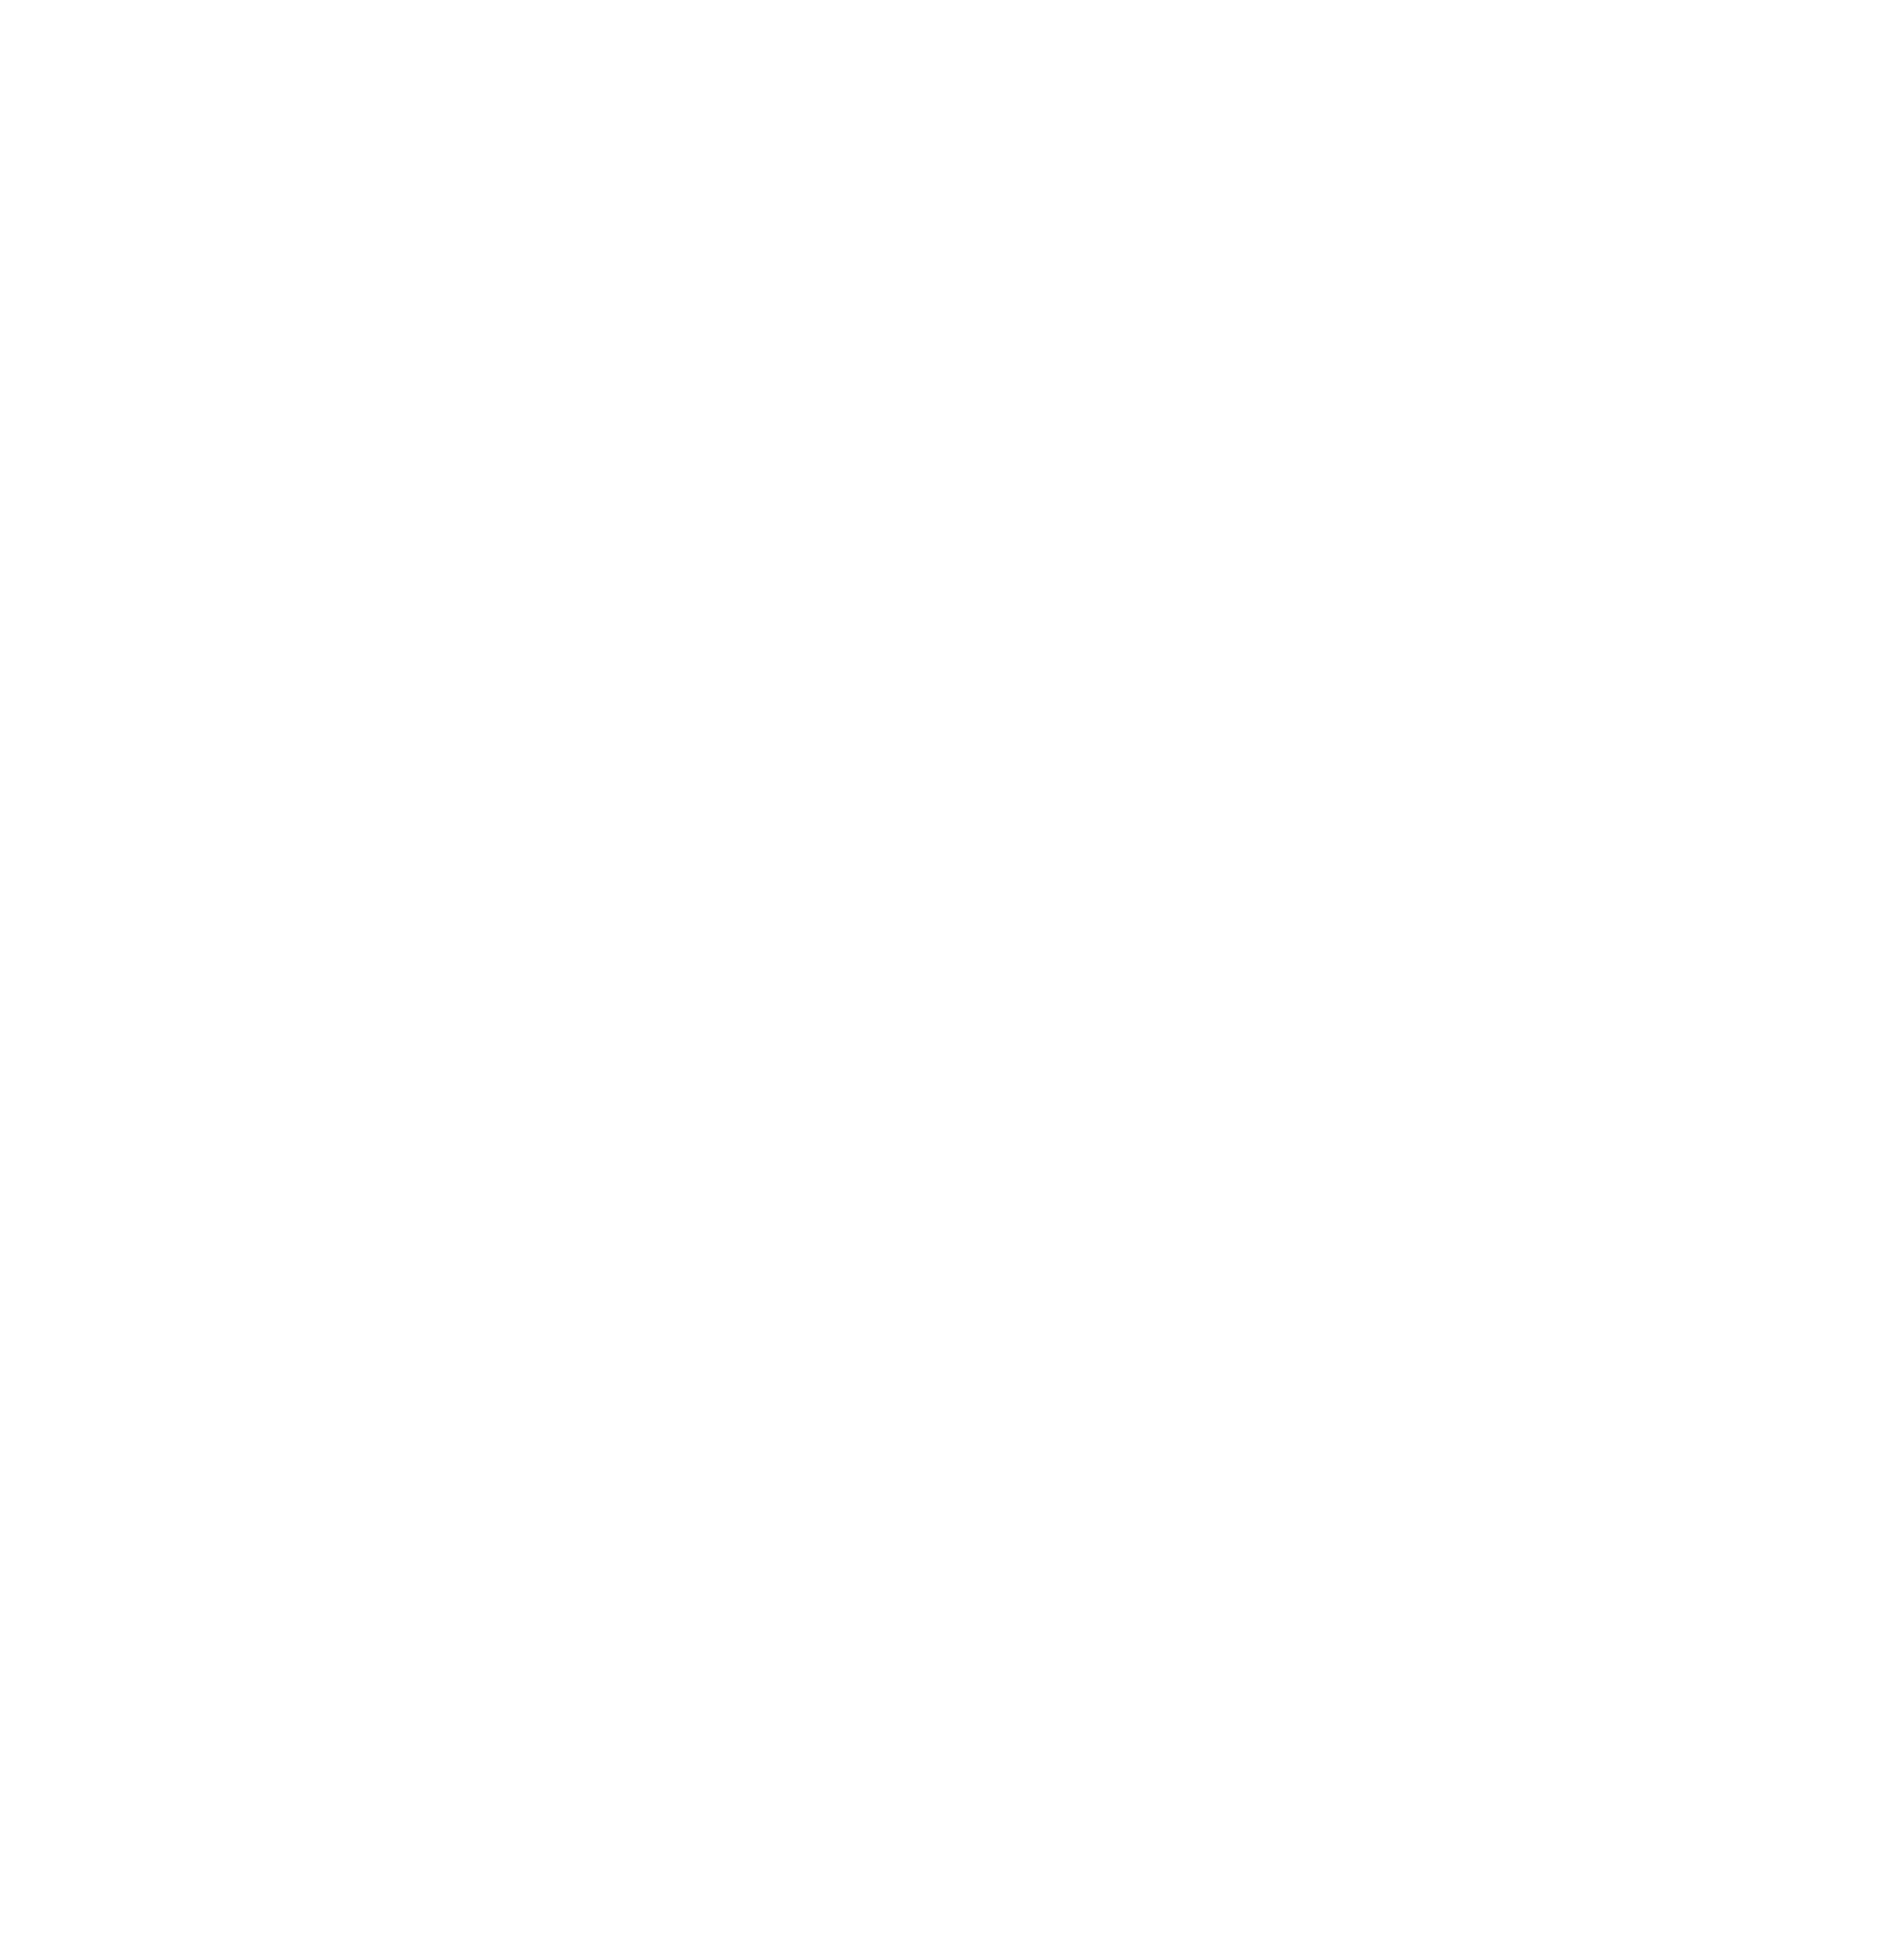

In [31]:
html = await page.content()
print(html)

<!DOCTYPE html>
<html><head><script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.144.js" type="text/javascript"></script><script crossorigin="anonymous" src="//vidstat.taboola.com/lite-unit/5.2.5/UnitSliderDesktop.min.js" type="text/javascript"></script><script async="" src="https://script.4dex.io/localstore.js" type="text/javascript"></script><style type="text/css">.swal-icon--error{border-color:#f27474;-webkit-animation:animateErrorIcon .5s;animation:animateErrorIcon .5s}.swal-icon--error__x-mark{position:relative;display:block;-webkit-animation:animateXMark .5s;animation:animateXMark .5s}.swal-icon--error__line{position:absolute;height:5px;width:47px;background-color:#f27474;display:block;top:37px;border-radius:2px}.swal-icon--error__line--left{-webkit-transform:rotate(45deg);transform:rotate(45deg);left:17px}.swal-icon--error__line--right{-webkit-transform:rotate(-45deg);transform:rotate(-45deg);right:16px}@-webkit-keyframes animateErrorIcon{0%{-webkit-transfor
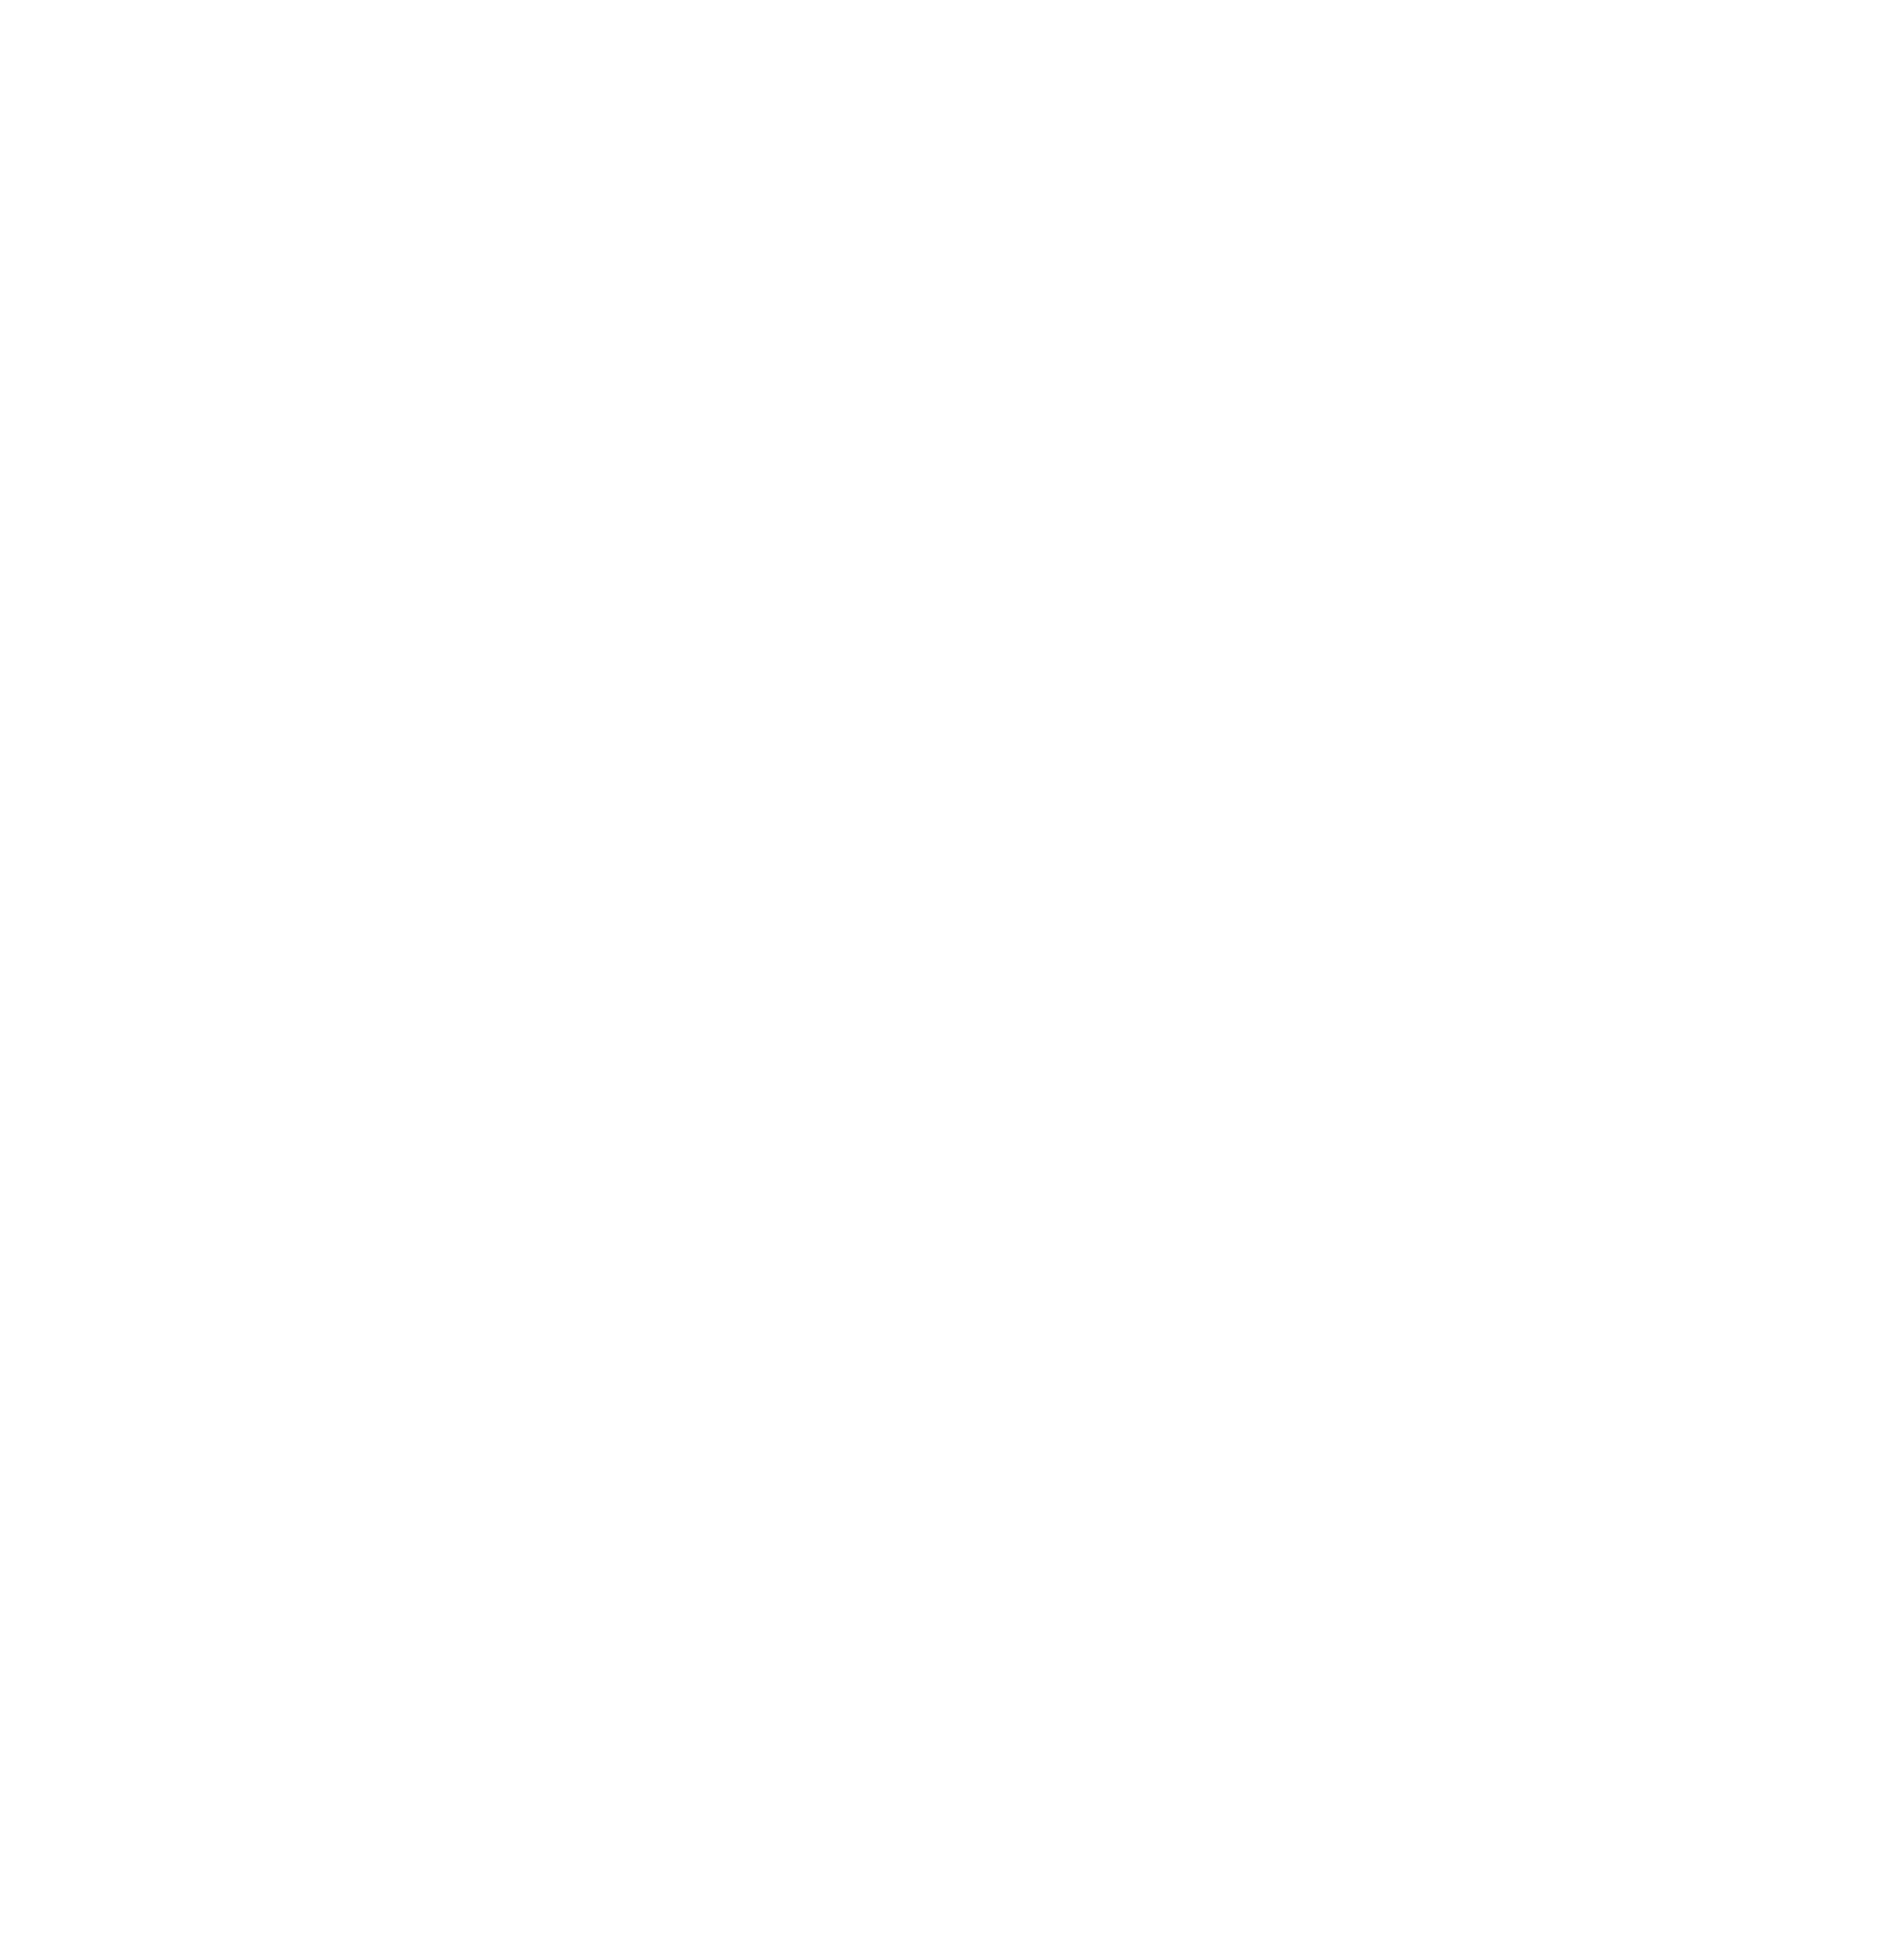

In [32]:
# time.sleep(1) #サーバーに負荷をかけないようにする(for文とスクレイピングが出てきたときは注意する)
#htmlを加工
soup = BeautifulSoup(html, "lxml")
soup

In [36]:
li_list = soup.find("table", class_="RaceList_DataItem hasMovieLink")
li_list

In [ ]:
concat_df["date"] = pd.to_datetime(concat_df["date"])


In [39]:
date = 20250309
date = pd.to_datetime(date, format="%Y%m%d")
date

Timestamp('2025-03-09 00:00:00')

# リーディングテーブル作成時に飛ばされるファイルがあるので試行錯誤中

In [2]:
import scraping

In [3]:
html_path_jockey_leading = list(
    (scraping.HTML_LEADING_DIR/ "jockey_leading").glob("*.bin")
)
html_path_jockey_leading, len(html_path_jockey_leading)

([PosixPath('../data/html/leading/jockey_leading/2021_02.bin'),
  PosixPath('../data/html/leading/jockey_leading/2011_05.bin'),
  PosixPath('../data/html/leading/jockey_leading/2020_02.bin'),
  PosixPath('../data/html/leading/jockey_leading/2013_04.bin'),
  PosixPath('../data/html/leading/jockey_leading/2018_02.bin'),
  PosixPath('../data/html/leading/jockey_leading/2023_02.bin'),
  PosixPath('../data/html/leading/jockey_leading/2008_04.bin'),
  PosixPath('../data/html/leading/jockey_leading/2013_02.bin'),
  PosixPath('../data/html/leading/jockey_leading/2012_03.bin'),
  PosixPath('../data/html/leading/jockey_leading/2017_03.bin'),
  PosixPath('../data/html/leading/jockey_leading/2022_03.bin'),
  PosixPath('../data/html/leading/jockey_leading/2013_03.bin'),
  PosixPath('../data/html/leading/jockey_leading/2009_03.bin'),
  PosixPath('../data/html/leading/jockey_leading/2015_03.bin'),
  PosixPath('../data/html/leading/jockey_leading/2021_01.bin'),
  PosixPath('../data/html/leading/jockey

In [32]:
# html_path_jockey_leadingのうち、2014_01を取得
html_path_jockey_leading = list(
    (scraping.HTML_LEADING_DIR/ "jockey_leading").glob("2014_01*.bin")
)
html_path_jockey_leading

[PosixPath('../data/html/leading/jockey_leading/2014_01.bin')]

In [ ]:
def updating_rawdf(
    new_df: pd.DataFrame,
    key: str,
    save_filename: str,
    save_dir: Path = RAWDF_DIR,
) -> None:
    """
    既存のrawdfに新しいデータを追加して保存する関数。
    """
    save_dir.mkdir(parents=True, exist_ok=True)
    if (save_dir / save_filename).exists():
        old_df = pd.read_csv(save_dir / save_filename, sep="\t", dtype={f"{key}": str})
        # 念の為、key列をstr型に変換
        new_df[key] = new_df[key].astype(str)
        df = pd.concat([old_df[~old_df[key].isin(new_df[key])], new_df])
        df.to_csv(save_dir / save_filename, sep="\t", index=False)
    else:
        new_df.to_csv(save_dir / save_filename, sep="\t", index=False)

RAWDF_DIR = Path("..","data","rawdf")
save_dir: Path = RAWDF_DIR
save_filename: str = "jockey_leading.csv"
dfs = {}
for html_path in tqdm(html_path_jockey_leading):    
        with open(html_path, "rb") as f:
            try:
                # ファイル名からrace_idを取得
                page_id = html_path.stem
                html = f.read()
                soup = BeautifulSoup(html, "lxml").find("table", class_="nk_tb_common")
                df = pd.read_html(html)[0]  
                df.columns = ["_".join(col) if col[0] != col[1] else col[0] for col in df.columns]
                # jockey_id列追加
                a_list = soup.find_all("a", href=re.compile(r"^/jockey/"))
                jockey_id_list = []
                for a in a_list:
                    jockey_id = re.findall(r"\d+",a["href"])[0]
                    jockey_id_list.append(jockey_id)
                # 最初の列にjockey_idを挿入
                df.insert(0, "jockey_id", jockey_id_list)
                dfs[jockey_id] = df
                # 最初の列にpage_idを挿入
                df.insert(0, "page_id", page_id)
            except IndexError as e:
                print(f"table not found at {page_id}")
                continue
            except AttributeError as e:
                print(f"{e} at {page_id}")
                continue
concat_df = pd.concat(dfs.values())
        # concat_df.columns = ["_".join(col) if col[0] != col[1] else col[0] for col in df.columns]
concat_df.columns = concat_df.columns.str.replace(" ","")       
        # save_dir.mkdir(parents=True, exist_ok=True)
updating_rawdf(   
            concat_df,
            key="page_id",
            save_filename=save_filename,
            save_dir=save_dir,
        )
# concat_df.to_csv(save_dir / save_filename, sep="\t", index=False)
jockey_leading = concat_df


NameError: name 'RAWDF_DIR' is not defined

In [38]:
# page_idの年を取得して、jockey_leadingに追加、年ごとに集計する
jockey_leading["year"] = jockey_leading["page_id"].apply(lambda x: int(x.split("_")[0]))
jockey_leading["year"].value_counts().sort_index()

year
2014    50
Name: count, dtype: int64

In [35]:
# jockey_id列の型を確認
jockey_leading["page_id"].value_counts().sort_index()

page_id
2014_01    50
Name: count, dtype: int64